In [1]:
import scipy.io
import numpy as np
from analysis.utils import *
import pandas as pd
import seaborn as sns

%load_ext autoreload
%autoreload 2
model_list = ['iIT341', 'iEK1008', 'iML1515', 'iNJ661', 'iPC815', 'iYL1228', 'STM_v1_0', 'e_coli_core', 'iJO1366', 'iSSON_1240']

# minRerouting

## 1. Zero Norm

100%|██████████| 10/10 [00:06<00:00,  1.63it/s]


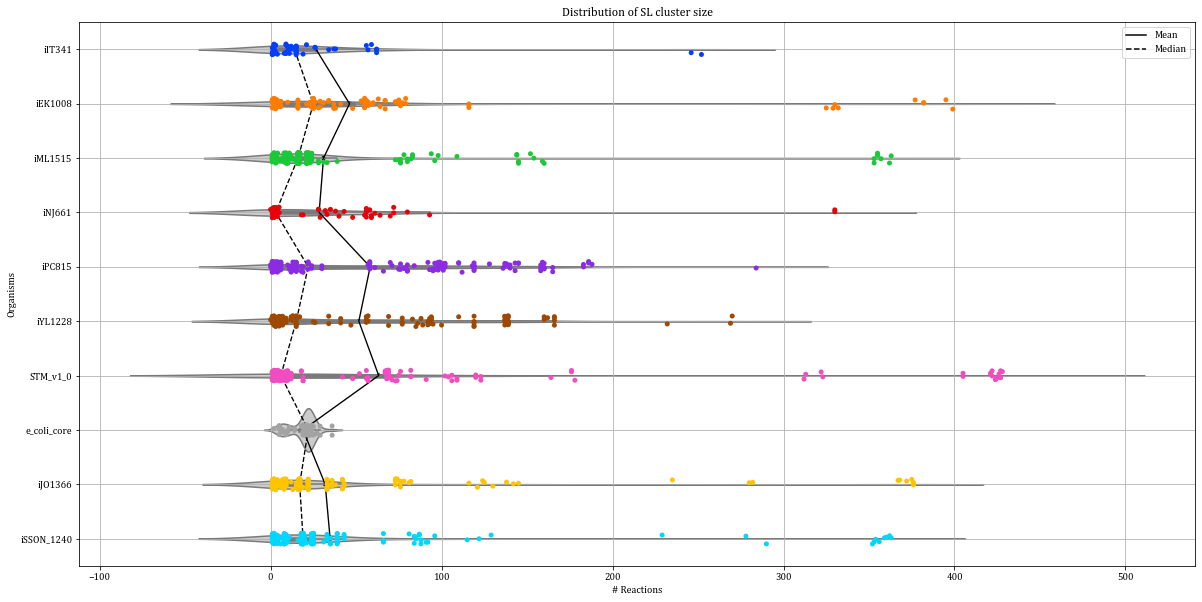

sl_size  median_sl_size
Organism                              
STM_v1_0     63.220238               6
e_coli_core  18.965909              22
iEK1008      46.165605              25
iIT341       26.592593              14
iJO1366      31.944030              17
iML1515      30.958042              16
iNJ661       28.386667               3
iPC815       58.232804              22
iSSON_1240   34.816479              19
iYL1228      51.611111              15

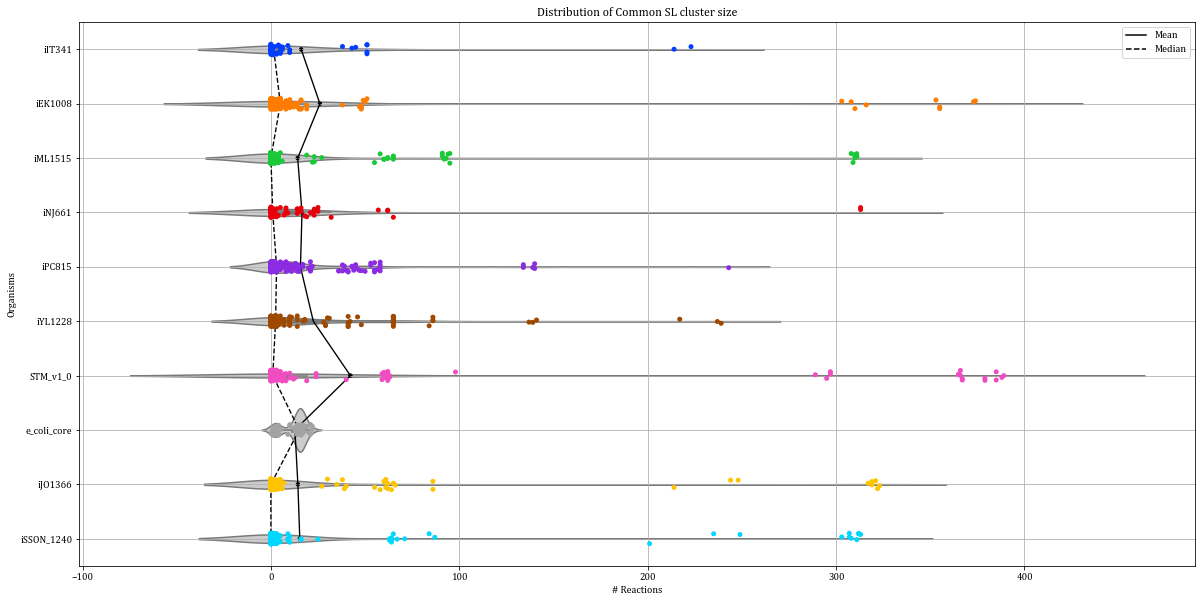

common_sl_size  median_common_sl_size
Organism                                          
STM_v1_0          42.184524                    1.0
e_coli_core       12.761364                   15.0
iEK1008           26.012739                    5.0
iIT341            16.092593                    1.5
iJO1366           14.320896                    0.0
iML1515           14.216783                    0.0
iNJ661            16.506667                    1.0
iPC815            15.687831                    3.0
iSSON_1240        15.333333                    0.0
iYL1228           22.500000                    2.5

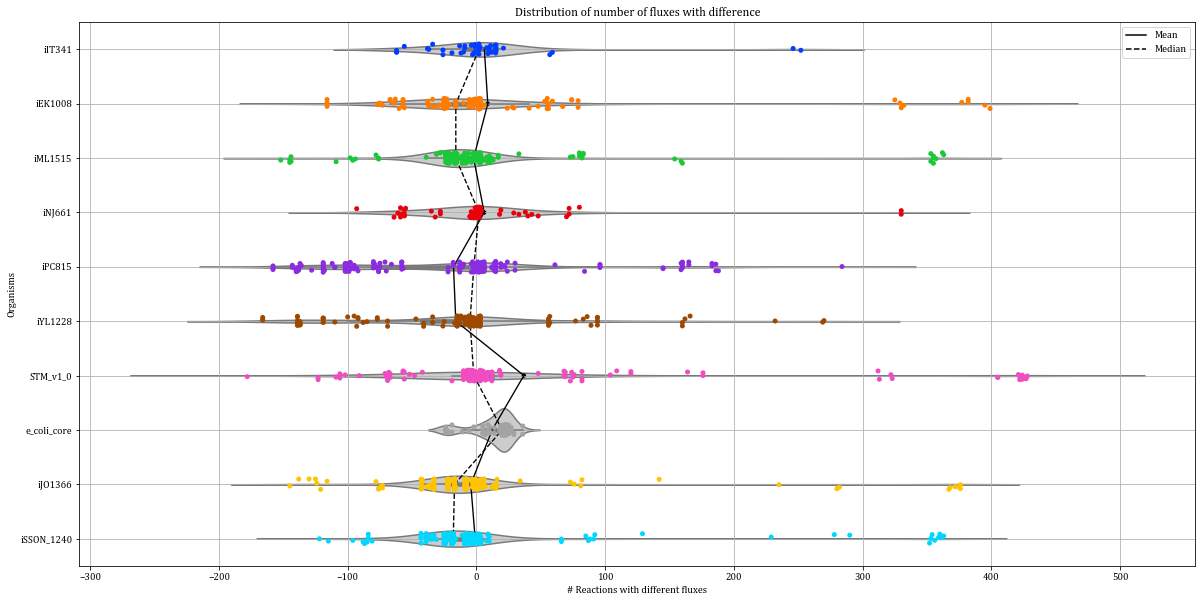

num_diff  median_num_diff
Organism                               
STM_v1_0     36.863095             -2.0
e_coli_core  12.261364             20.0
iEK1008       8.840764            -16.0
iIT341        6.185185              2.0
iJO1366      -4.376866            -17.0
iML1515      -2.160839            -16.0
iNJ661        6.013333              2.0
iPC815      -17.788360             -2.0
iSSON_1240   -0.966292            -18.0
iYL1228     -16.000000             -5.0

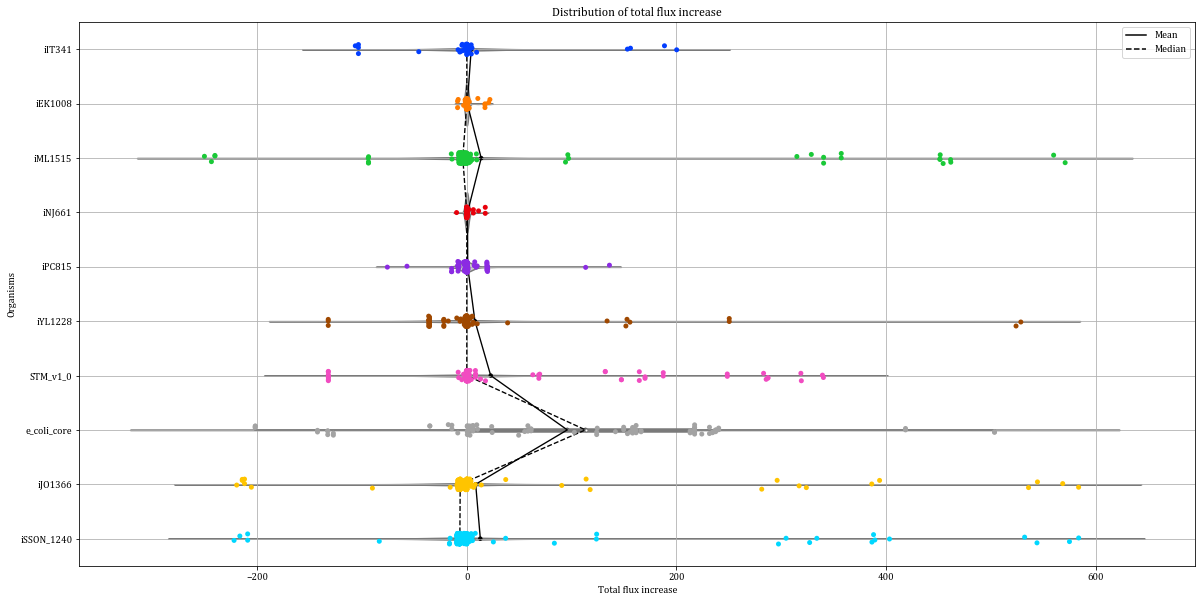

net_diff  median_net_diff
Organism                               
STM_v1_0     22.786079        -0.002970
e_coli_core  95.863130       113.259014
iEK1008       0.444383        -0.023439
iIT341        4.194877         0.000217
iJO1366       8.460092        -6.310392
iML1515      13.718517        -3.854505
iNJ661        0.660467         0.001685
iPC815        0.873522        -0.000140
iSSON_1240   12.890427        -6.644370
iYL1228       7.761777        -0.026601

In [2]:
norm = "zero"
df_main, _, psl_df_main = consolidate_results(model_list, norm)
consolidate_results_print_dfs(df_main, norm)

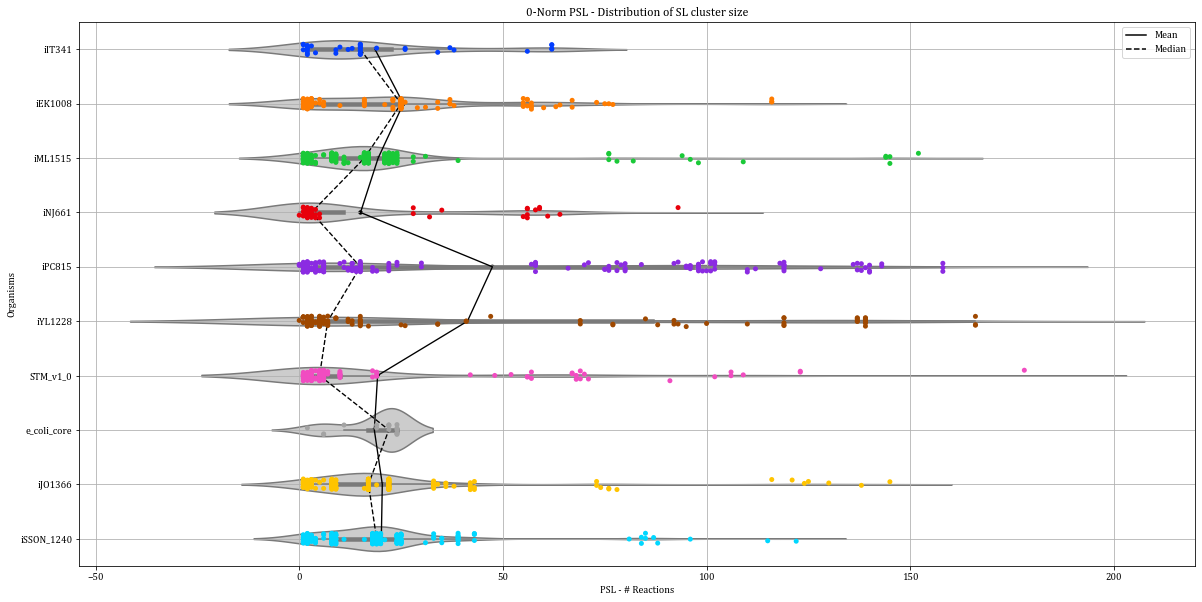

sl_size
Organism              
STM_v1_0     19.243902
e_coli_core  18.437500
iEK1008      25.561538
iIT341       18.615385
iJO1366      20.399177
iML1515      19.378486
iNJ661       15.050000
iPC815       47.424419
iSSON_1240   20.154812
iYL1228      41.294118

sl_size
Organism            
STM_v1_0           5
e_coli_core       22
iEK1008           25
iIT341            15
iJO1366           17
iML1515           16
iNJ661             3
iPC815            15
iSSON_1240        19
iYL1228            7

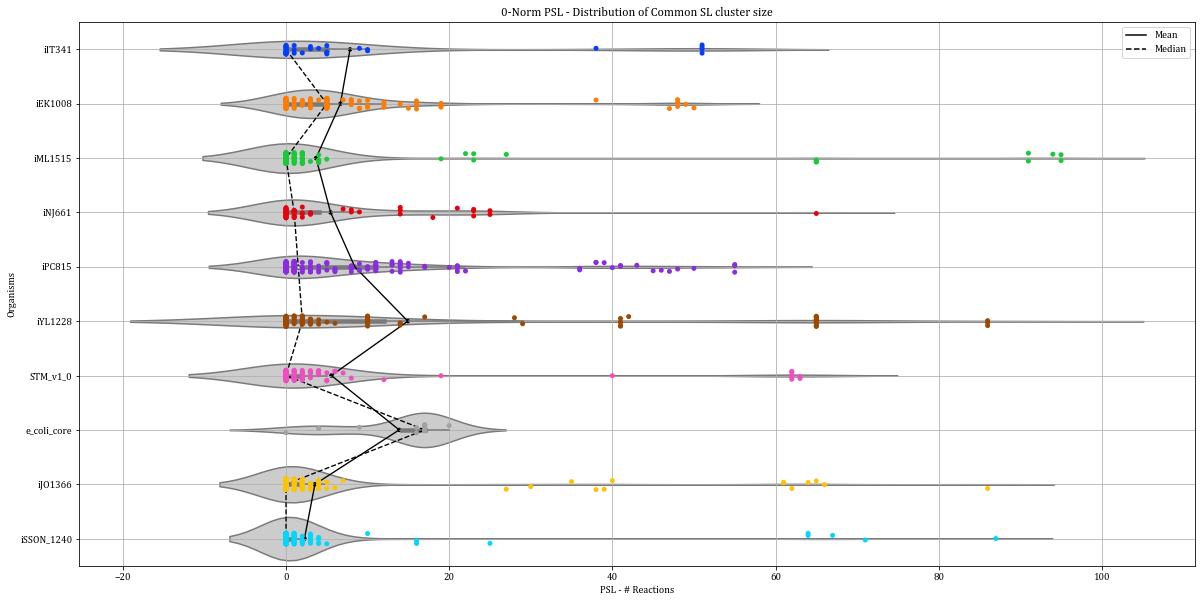

common_sl_size
Organism                   
STM_v1_0           5.560976
e_coli_core       13.875000
iEK1008            6.661538
iIT341             7.846154
iJO1366            3.543210
iML1515            3.681275
iNJ661             5.466667
iPC815             8.430233
iSSON_1240         2.259414
iYL1228           14.932773

common_sl_size
Organism                   
STM_v1_0                0.0
e_coli_core            17.0
iEK1008                 5.0
iIT341                  0.0
iJO1366                 0.0
iML1515                 0.0
iNJ661                  1.0
iPC815                  1.5
iSSON_1240              0.0
iYL1228                 2.0

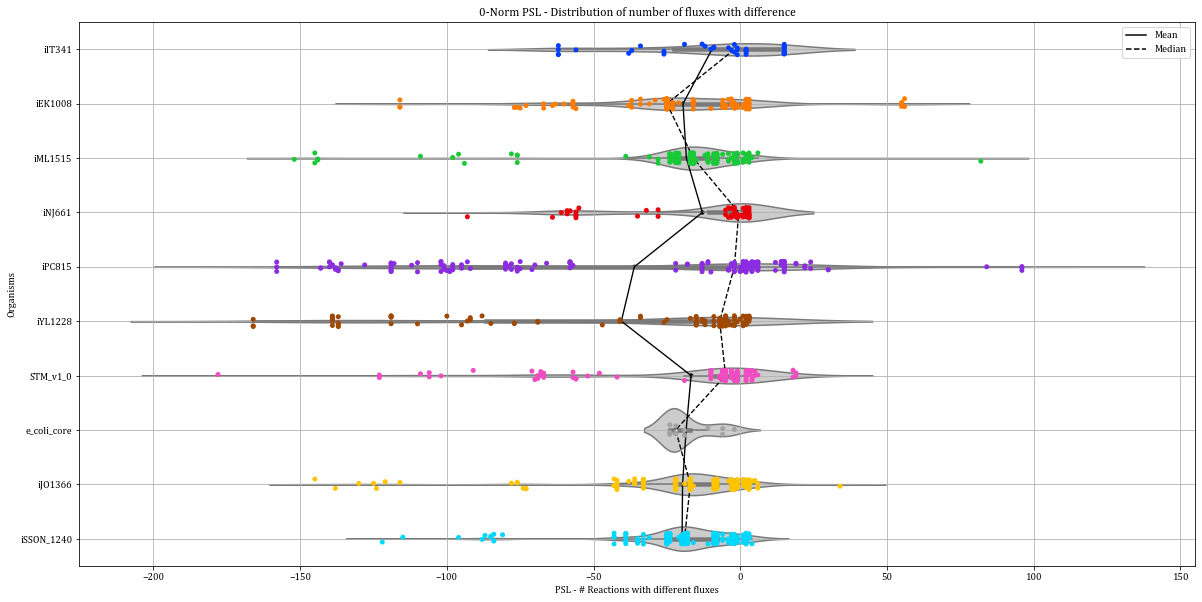

num_diff
Organism              
STM_v1_0    -16.756098
e_coli_core -18.437500
iEK1008     -19.515385
iIT341       -9.641026
iJO1366     -19.658436
iML1515     -18.358566
iNJ661      -12.916667
iPC815      -36.110465
iSSON_1240  -19.820084
iYL1228     -40.521008

num_diff
Organism             
STM_v1_0         -5.0
e_coli_core     -22.0
iEK1008         -25.0
iIT341           -2.0
iJO1366         -17.0
iML1515         -16.0
iNJ661           -0.5
iPC815           -2.0
iSSON_1240      -19.0
iYL1228          -7.0

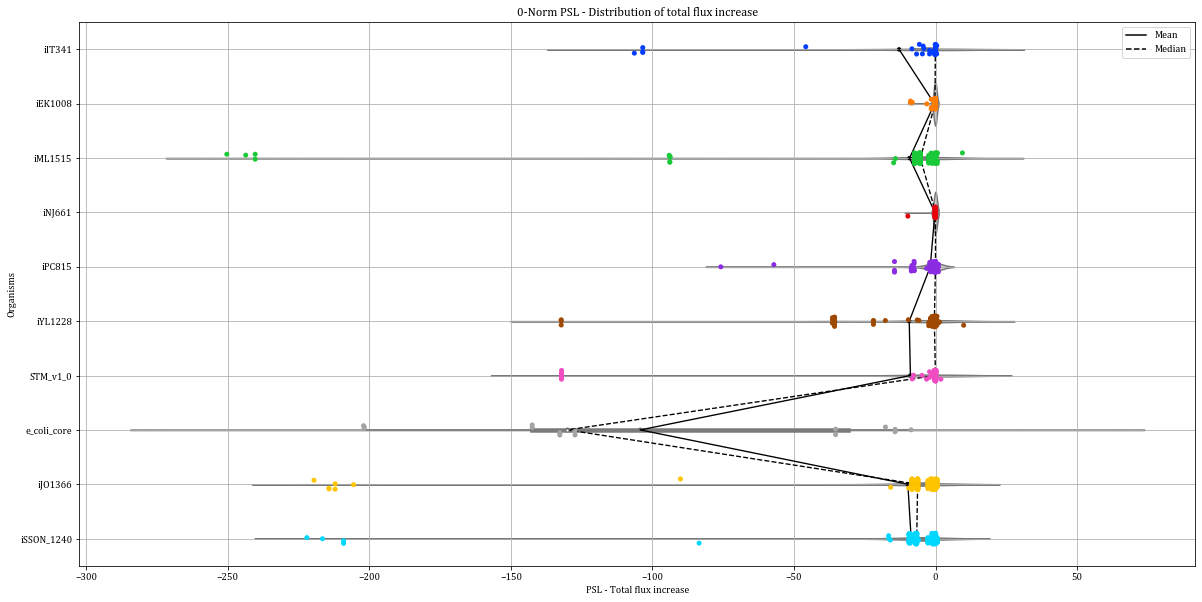

net_diff
Organism               
STM_v1_0      -8.858025
e_coli_core -104.315188
iEK1008       -0.363179
iIT341       -12.864524
iJO1366       -9.772318
iML1515       -9.161762
iNJ661        -0.201451
iPC815        -1.855855
iSSON_1240    -8.600510
iYL1228       -9.279424

net_diff
Organism               
STM_v1_0      -0.012760
e_coli_core -130.037954
iEK1008       -0.163016
iIT341        -0.065027
iJO1366       -6.310392
iML1515       -5.337007
iNJ661        -0.000020
iPC815        -0.011944
iSSON_1240    -6.644370
iYL1228       -0.404126

In [3]:
columns_of_interest = ["sl_size", "common_sl_size", "num_diff", "net_diff"]
fname_list = ["psl_sl_cluster_size", "psl_common_sl_size", "psl_num_diff", "psl_net_diff"]
title_list = ["0-Norm PSL - Distribution of SL cluster size", "0-Norm PSL - Distribution of Common SL cluster size", \
              "0-Norm PSL - Distribution of number of fluxes with difference", "0-Norm PSL - Distribution of total flux increase"]
xlabel_list = ["PSL - # Reactions", "PSL - # Reactions", "PSL - # Reactions with different fluxes", "PSL - Total flux increase"]

for col, fname, title, xlabel in zip(columns_of_interest, fname_list, title_list, xlabel_list):    
    df_select = psl_df_main[[col, "Organism"]]

    plt.figure(figsize=(20,10))
    ax = sns.violinplot(x=col, y="Organism", data=psl_df_main, color="0.8")
                        # palette=sns.color_palette("bright"), 
    ax = sns.stripplot(x=col, y="Organism", data=psl_df_main, 
                    palette=sns.color_palette("bright"), jitter=True)

    ax = sns.pointplot(x=col, y='Organism', ci=None, data=psl_df_main, 
                    color="k", estimator=np.mean, label="mean", scale=0.5) 
    ax = sns.pointplot(x=col, y='Organism', ci=None, data=psl_df_main, color="k", 
                    linestyles='--', estimator=np.median, label="mean", scale=0.5) 

    plt.grid()
    ax.set_title(title)
    ax.set_ylabel("Organisms")
    ax.set_xlabel(xlabel)
    from matplotlib.lines import Line2D
    line1 = Line2D([0], [0], label='Mean', color='k')
    line2 = Line2D([0], [0], label='Median', color='k', ls="--")
    plt.legend(handles=[line1, line2])
    plt.savefig("../results/images/psl_violin_zero_"+fname+".png")
    plt.show()

    display(psl_df_main[[col, "Organism"]].groupby("Organism").mean())
    display(psl_df_main[[col, "Organism"]].groupby("Organism").median())

## 2. One Norm

100%|██████████| 10/10 [00:06<00:00,  1.60it/s]


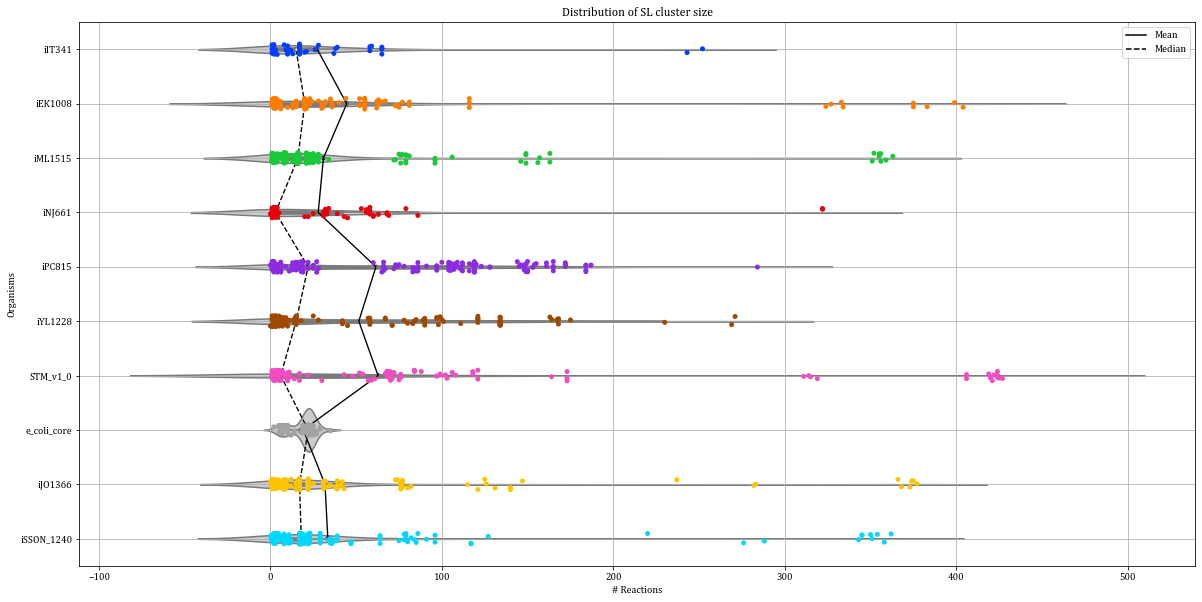

sl_size  median_sl_size
Organism                              
STM_v1_0     62.791667               6
e_coli_core  19.147727              22
iEK1008      44.496815              20
iIT341       27.370370              15
iJO1366      31.839552              17
iML1515      30.930070              16
iNJ661       27.880000               3
iPC815       61.529101              22
iSSON_1240   33.494382              18
iYL1228      51.555556              15

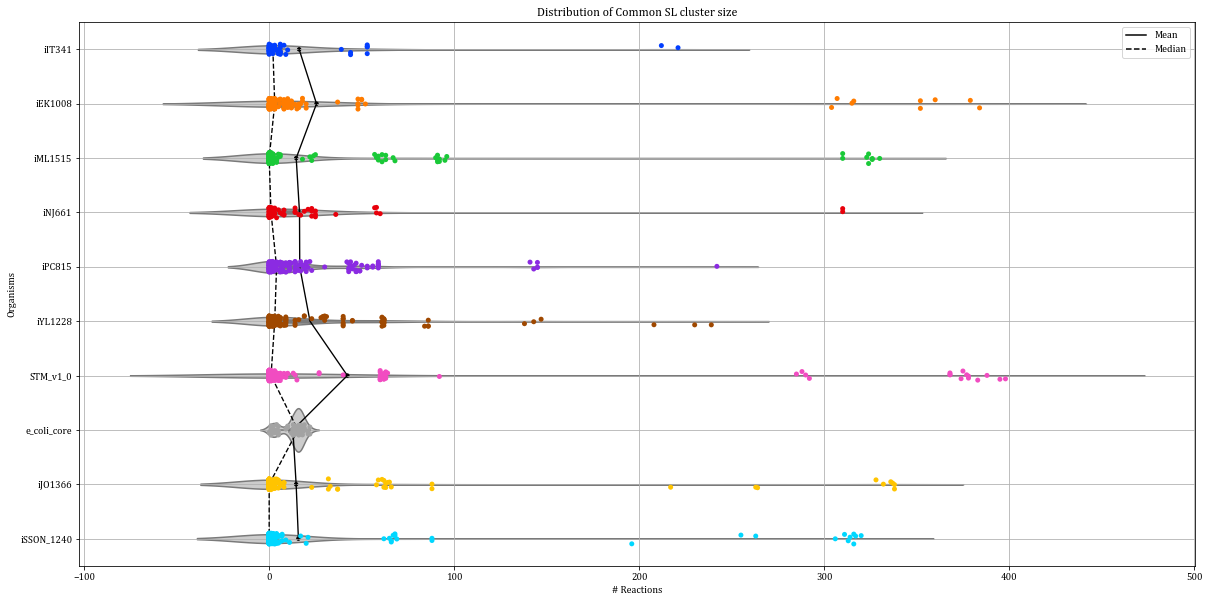

common_sl_size  median_common_sl_size
Organism                                          
STM_v1_0          42.261905                    1.0
e_coli_core       12.818182                   15.5
iEK1008           25.592357                    3.0
iIT341            16.203704                    2.0
iJO1366           14.574627                    0.0
iML1515           14.611888                    0.0
iNJ661            16.400000                    1.0
iPC815            16.523810                    4.0
iSSON_1240        15.797753                    0.0
iYL1228           22.055556                    3.0

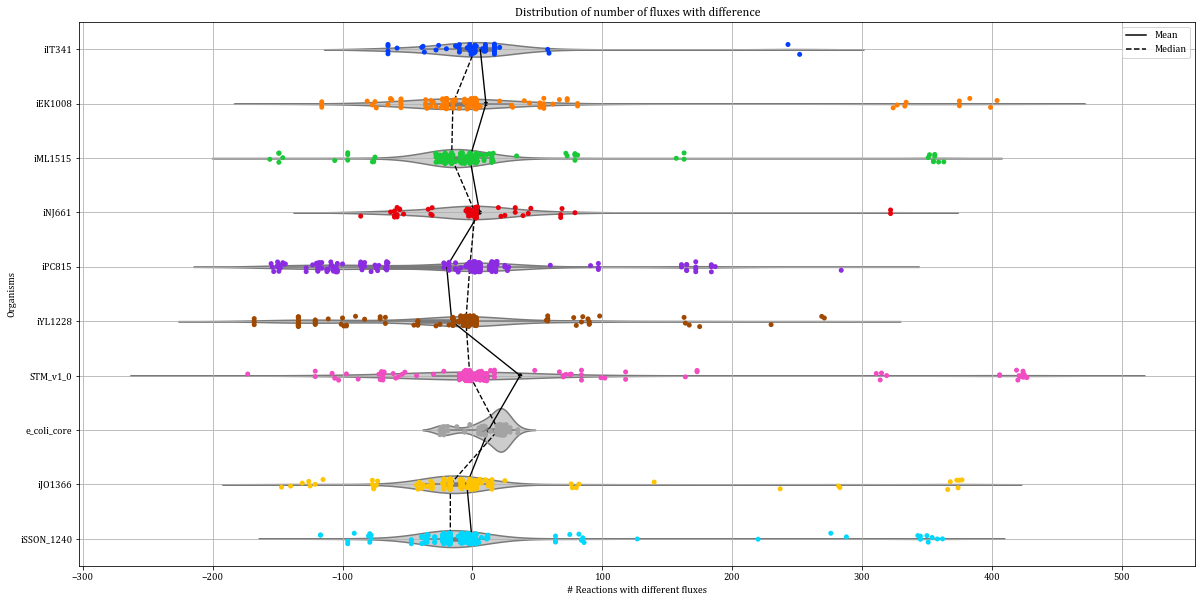

num_diff  median_num_diff
Organism                               
STM_v1_0     36.720238             -2.0
e_coli_core  12.465909             20.0
iEK1008      10.445860            -15.0
iIT341        6.074074              2.0
iJO1366      -4.287313            -17.0
iML1515      -1.993007            -16.0
iNJ661        5.560000              2.0
iPC815      -19.793651             -2.0
iSSON_1240   -0.363296            -17.0
iYL1228     -15.875000             -5.0

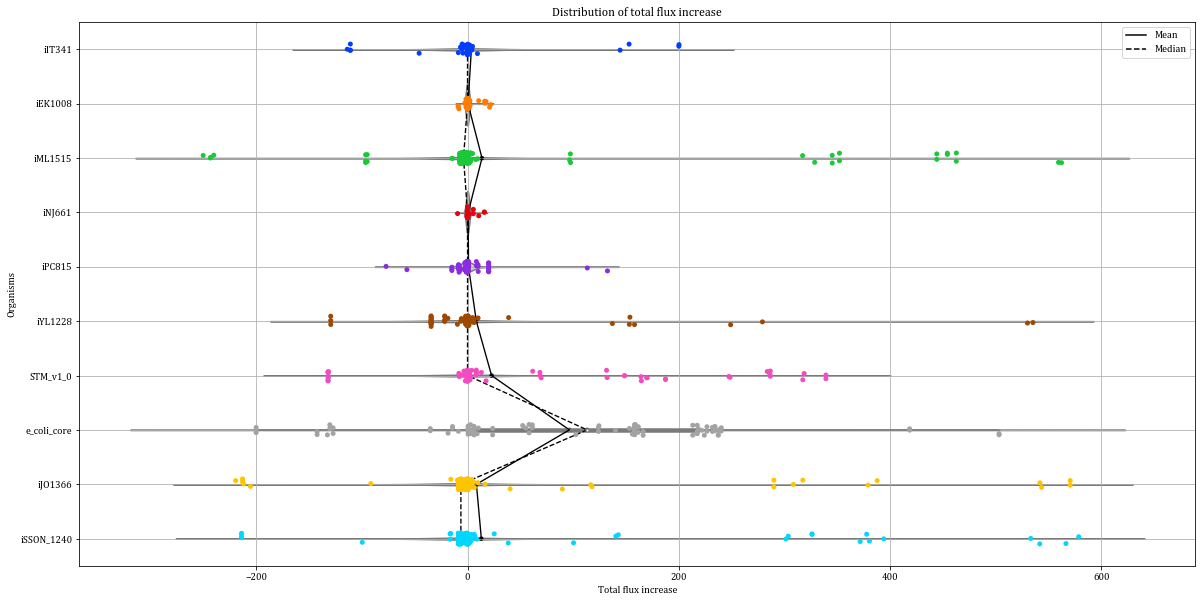

net_diff  median_net_diff
Organism                               
STM_v1_0     22.760801        -0.002970
e_coli_core  96.449549       113.259014
iEK1008       0.436131        -0.023409
iIT341        3.614622         0.000213
iJO1366       8.382528        -6.310392
iML1515      13.659407        -3.854505
iNJ661        0.589530         0.001685
iPC815        0.896381        -0.000138
iSSON_1240   13.052450        -6.312152
iYL1228       8.305189        -0.026602

In [4]:
norm = "one"
df_main, df_select, psl_df_main = consolidate_results(model_list, norm)
consolidate_results_print_dfs(df_main, norm)

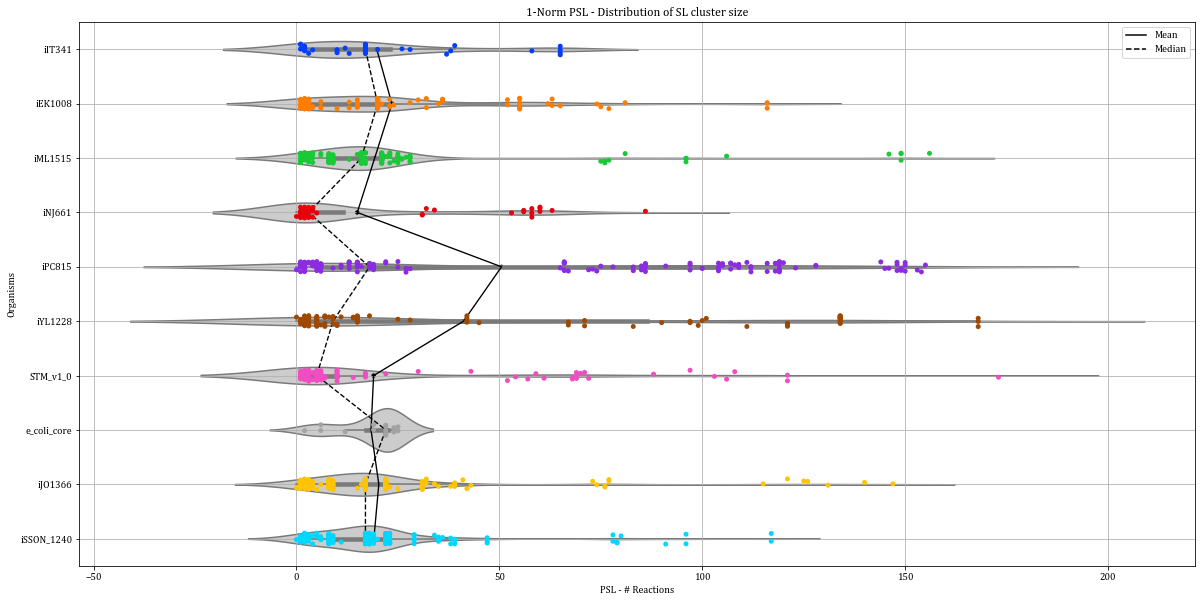

sl_size
Organism              
STM_v1_0     19.008130
e_coli_core  18.375000
iEK1008      23.515385
iIT341       19.794872
iJO1366      20.292181
iML1515      19.274900
iNJ661       14.983333
iPC815       50.534884
iSSON_1240   19.079498
iYL1228      41.176471

sl_size
Organism            
STM_v1_0           5
e_coli_core       22
iEK1008           20
iIT341            17
iJO1366           17
iML1515           16
iNJ661             3
iPC815            18
iSSON_1240        17
iYL1228            9

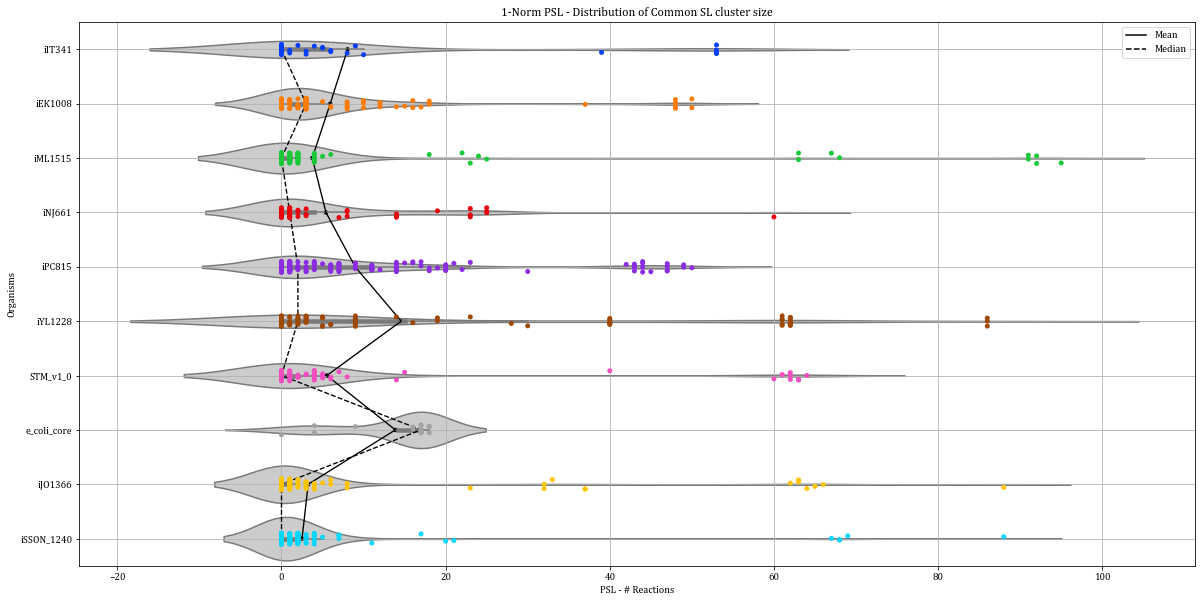

common_sl_size
Organism                   
STM_v1_0           5.520325
e_coli_core       13.875000
iEK1008            5.930769
iIT341             8.051282
iJO1366            3.251029
iML1515            3.749004
iNJ661             5.416667
iPC815             8.976744
iSSON_1240         2.502092
iYL1228           14.579832

common_sl_size
Organism                   
STM_v1_0                  0
e_coli_core              17
iEK1008                   3
iIT341                    0
iJO1366                   0
iML1515                   0
iNJ661                    1
iPC815                    2
iSSON_1240                0
iYL1228                   2

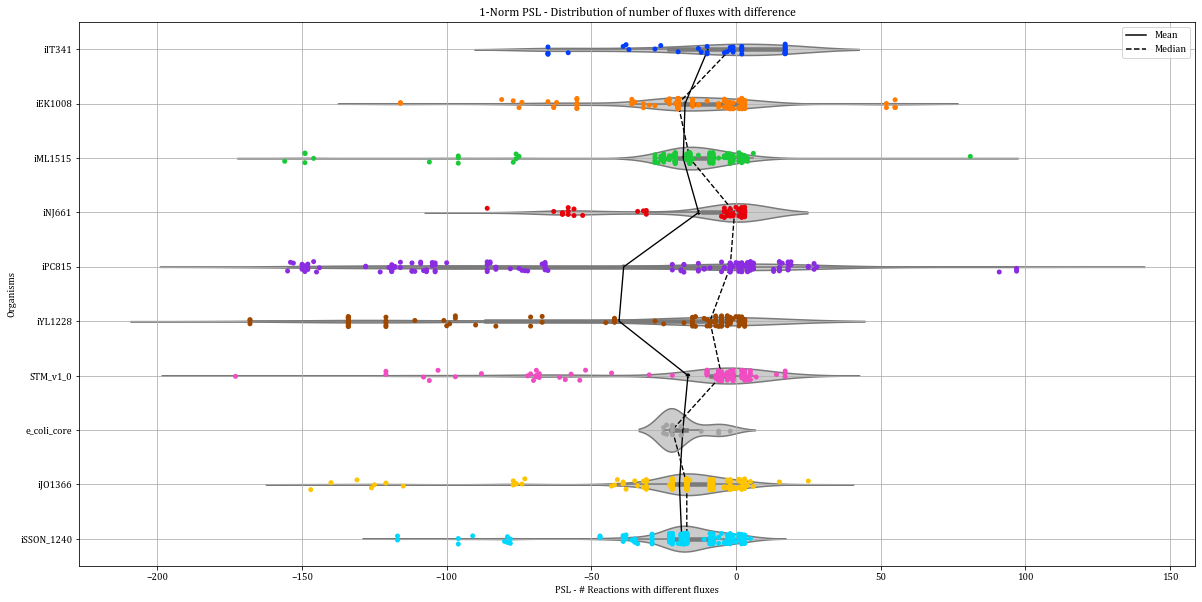

num_diff
Organism              
STM_v1_0    -16.601626
e_coli_core -18.375000
iEK1008     -17.607692
iIT341       -9.692308
iJO1366     -19.551440
iML1515     -18.239044
iNJ661      -12.916667
iPC815      -38.825581
iSSON_1240  -18.744770
iYL1228     -40.420168

num_diff
Organism             
STM_v1_0         -5.0
e_coli_core     -22.0
iEK1008         -20.0
iIT341           -2.0
iJO1366         -17.0
iML1515         -16.0
iNJ661           -0.5
iPC815           -2.0
iSSON_1240      -17.0
iYL1228          -9.0

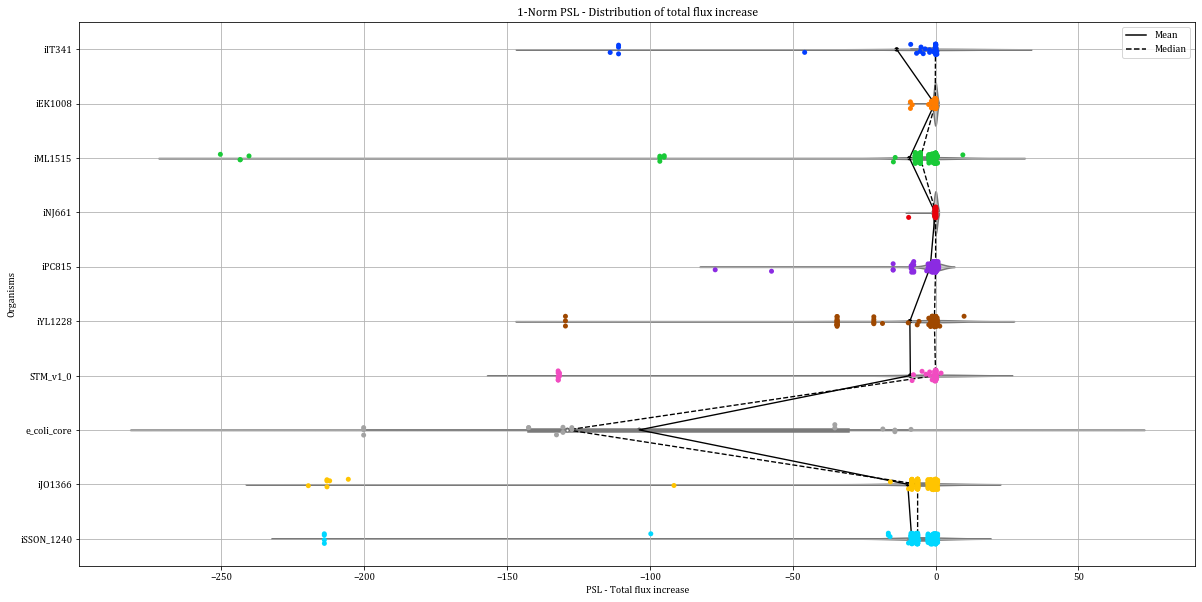

net_diff
Organism               
STM_v1_0      -8.852578
e_coli_core -103.765439
iEK1008       -0.353642
iIT341       -13.644246
iJO1366       -9.768848
iML1515       -9.168109
iNJ661        -0.196921
iPC815        -1.874870
iSSON_1240    -8.383951
iYL1228       -9.029302

net_diff
Organism               
STM_v1_0      -0.012760
e_coli_core -128.906899
iEK1008       -0.154812
iIT341        -0.065027
iJO1366       -6.310392
iML1515       -5.337007
iNJ661        -0.000020
iPC815        -0.013685
iSSON_1240    -6.312152
iYL1228       -0.453651

In [5]:
columns_of_interest = ["sl_size", "common_sl_size", "num_diff", "net_diff"]
fname_list = ["psl_sl_cluster_size", "psl_common_sl_size", "psl_num_diff", "psl_net_diff"]
title_list = ["1-Norm PSL - Distribution of SL cluster size", "1-Norm PSL - Distribution of Common SL cluster size", \
              "1-Norm PSL - Distribution of number of fluxes with difference", "1-Norm PSL - Distribution of total flux increase"]
xlabel_list = ["PSL - # Reactions", "PSL - # Reactions", "PSL - # Reactions with different fluxes", "PSL - Total flux increase"]

for col, fname, title, xlabel in zip(columns_of_interest, fname_list, title_list, xlabel_list):    
    df_select = psl_df_main[[col, "Organism"]]

    plt.figure(figsize=(20,10))
    ax = sns.violinplot(x=col, y="Organism", data=psl_df_main, color="0.8")
                        # palette=sns.color_palette("bright"), 
    ax = sns.stripplot(x=col, y="Organism", data=psl_df_main, 
                    palette=sns.color_palette("bright"), jitter=True)

    ax = sns.pointplot(x=col, y='Organism', ci=None, data=psl_df_main, 
                    color="k", estimator=np.mean, label="mean", scale=0.5) 
    ax = sns.pointplot(x=col, y='Organism', ci=None, data=psl_df_main, color="k", 
                    linestyles='--', estimator=np.median, label="mean", scale=0.5) 

    plt.grid()
    ax.set_title(title)
    ax.set_ylabel("Organisms")
    ax.set_xlabel(xlabel)
    from matplotlib.lines import Line2D
    line1 = Line2D([0], [0], label='Mean', color='k')
    line2 = Line2D([0], [0], label='Median', color='k', ls="--")
    plt.legend(handles=[line1, line2])
    plt.savefig("../results/images/psl_violin_one_"+fname+".png")
    plt.show()

    display(psl_df_main[[col, "Organism"]].groupby("Organism").mean())
    display(psl_df_main[[col, "Organism"]].groupby("Organism").median())

## 3. Two Norm

100%|██████████| 10/10 [00:15<00:00,  1.56s/it]


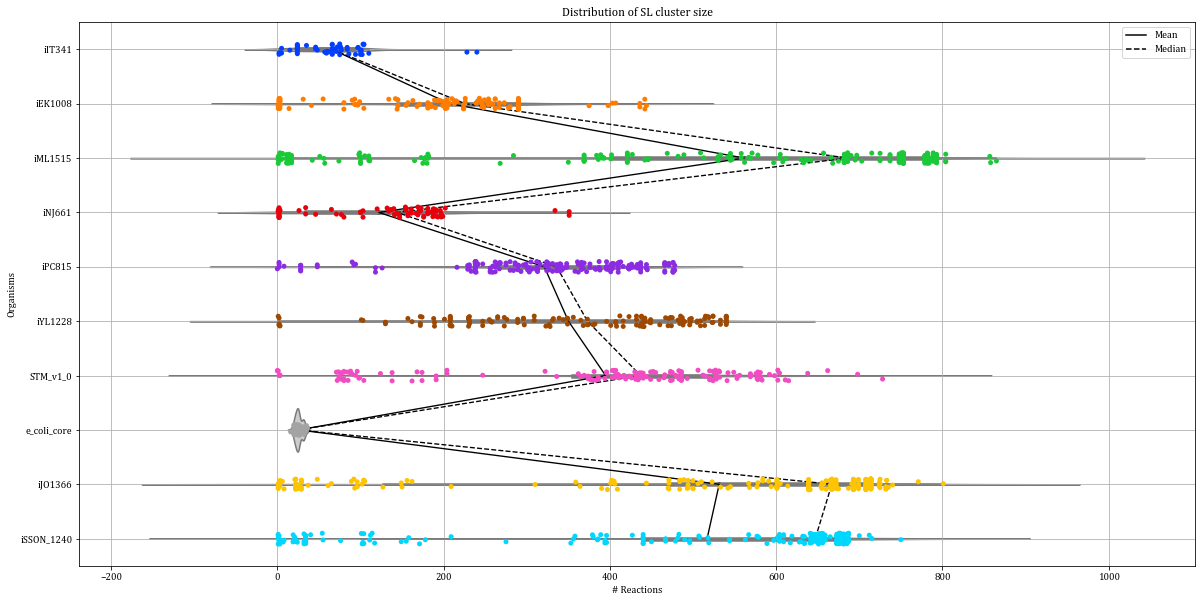

sl_size  median_sl_size
Organism                               
STM_v1_0     394.845238             437
e_coli_core   25.659091              25
iEK1008      207.350318             226
iIT341        65.574074              66
iJO1366      531.488806             667
iML1515      561.643357             686
iNJ661       122.040000             144
iPC815       321.126984             336
iSSON_1240   516.932584             647
iYL1228      350.125000             373

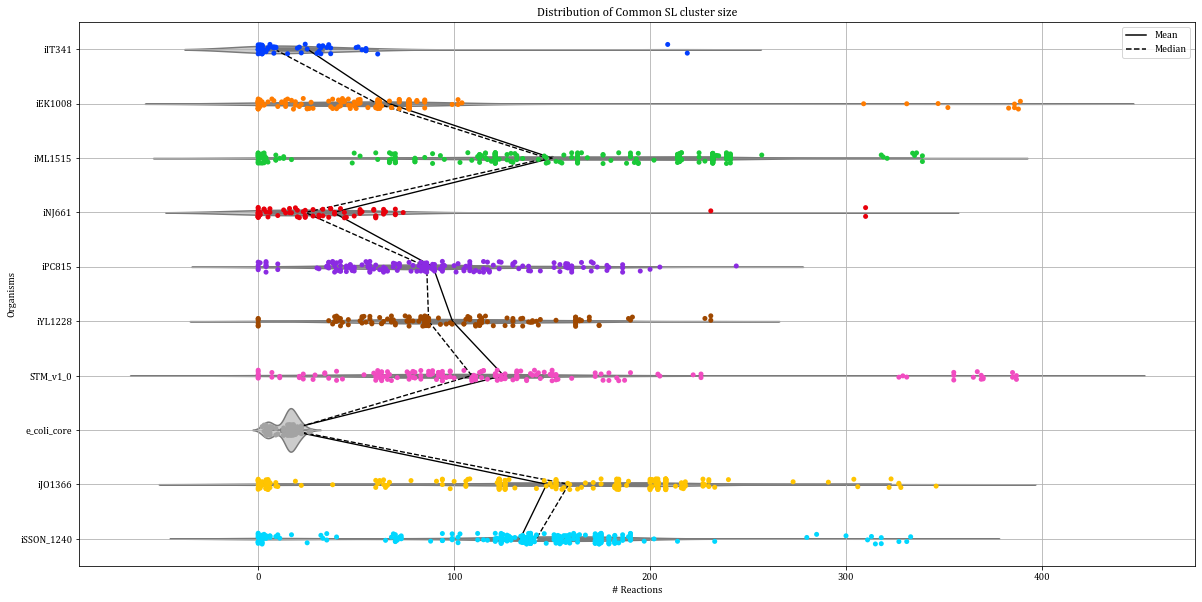

common_sl_size  median_common_sl_size
Organism                                          
STM_v1_0         125.261905                  109.0
e_coli_core       14.488636                   16.0
iEK1008           67.044586                   61.0
iIT341            25.277778                    8.5
iJO1366          147.227612                  158.5
iML1515          150.034965                  147.5
iNJ661            38.266667                   24.0
iPC815            89.253968                   86.0
iSSON_1240       133.745318                  142.0
iYL1228           99.145833                   87.0

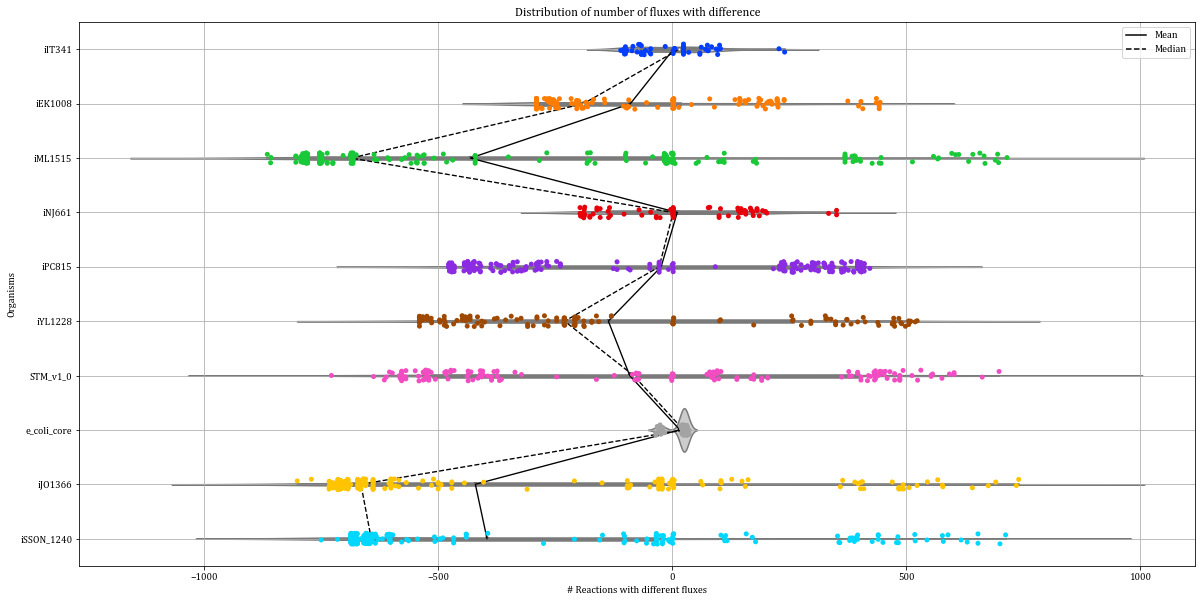

num_diff  median_num_diff
Organism                                
STM_v1_0     -90.869048            -82.5
e_coli_core   16.318182             24.0
iEK1008      -89.617834           -190.0
iIT341         2.425926             14.5
iJO1366     -420.563433           -665.0
iML1515     -431.062937           -686.0
iNJ661        10.680000              2.0
iPC815       -23.835979            -28.0
iSSON_1240  -395.726592           -643.0
iYL1228     -136.472222           -230.0

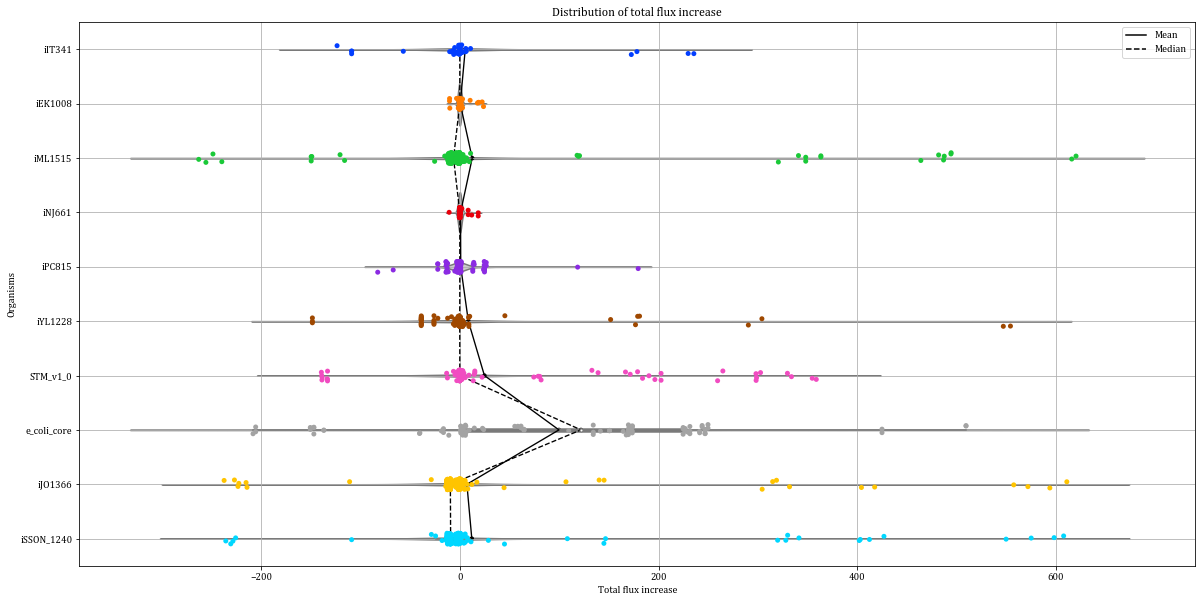

net_diff  median_net_diff
Organism                               
STM_v1_0     24.768153        -0.004915
e_coli_core  99.783761       121.956252
iEK1008       0.445864        -0.029027
iIT341        5.456590         0.000171
iJO1366       7.137551        -9.514316
iML1515      12.473043        -6.329172
iNJ661        0.733614         0.001751
iPC815        0.926382        -0.000089
iSSON_1240   12.065012        -9.243110
iYL1228       8.585304        -0.073994

In [6]:
norm = "two"
df_main, df_select, psl_df_main = consolidate_results(model_list, norm)
consolidate_results_print_dfs(df_main, norm)

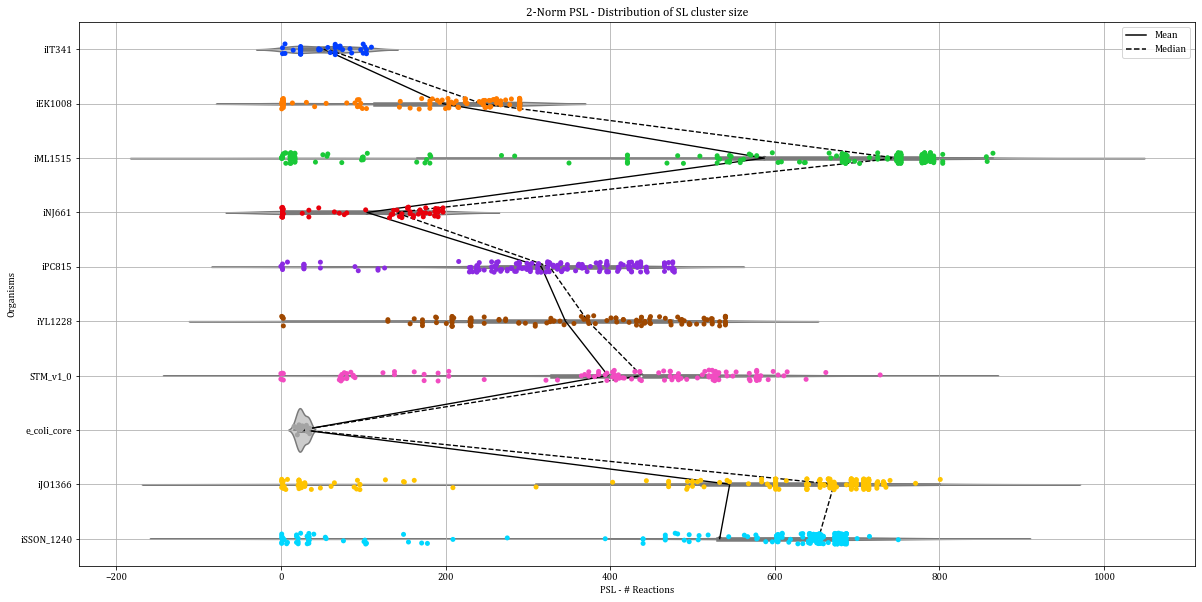

sl_size
Organism               
STM_v1_0     397.325203
e_coli_core   25.687500
iEK1008      197.015385
iIT341        52.666667
iJO1366      545.242798
iML1515      587.330677
iNJ661       104.516667
iPC815       316.447674
iSSON_1240   533.037657
iYL1228      345.672269

sl_size
Organism            
STM_v1_0       438.0
e_coli_core     25.0
iEK1008        244.5
iIT341          57.0
iJO1366        672.0
iML1515        748.0
iNJ661         139.0
iPC815         326.5
iSSON_1240     653.0
iYL1228        373.0

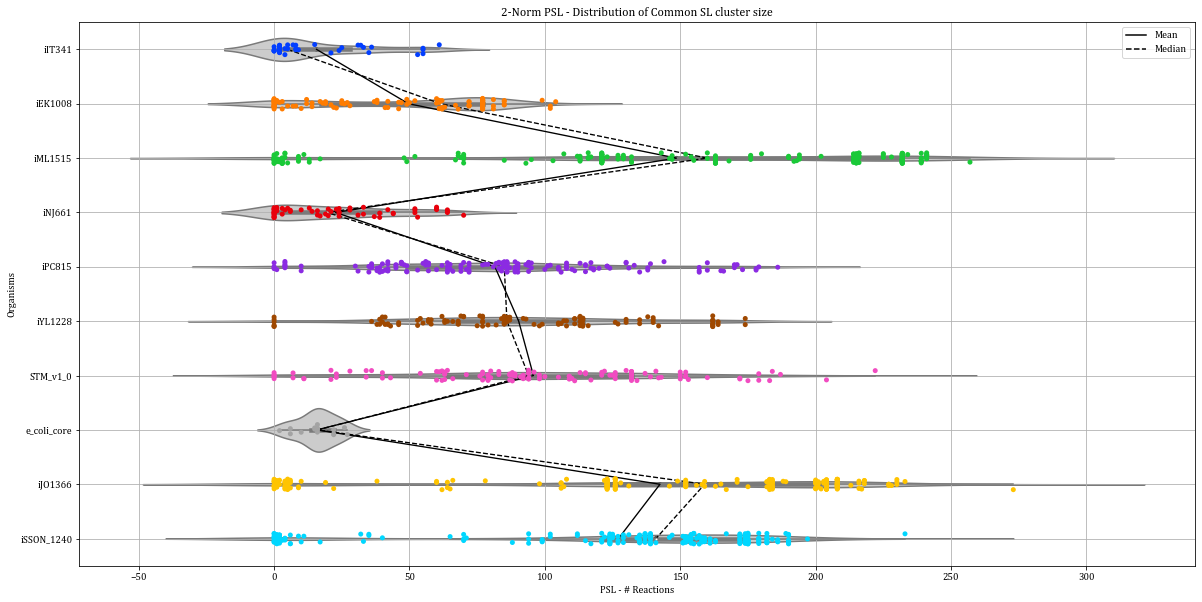

common_sl_size
Organism                   
STM_v1_0          95.772358
e_coli_core       15.812500
iEK1008           49.653846
iIT341            15.666667
iJO1366          142.510288
iML1515          148.585657
iNJ661            22.733333
iPC815            81.558140
iSSON_1240       127.154812
iYL1228           90.327731

common_sl_size
Organism                   
STM_v1_0               94.0
e_coli_core            16.0
iEK1008                61.5
iIT341                  5.0
iJO1366               159.0
iML1515               160.0
iNJ661                 19.5
iPC815                 85.0
iSSON_1240            141.0
iYL1228                86.0

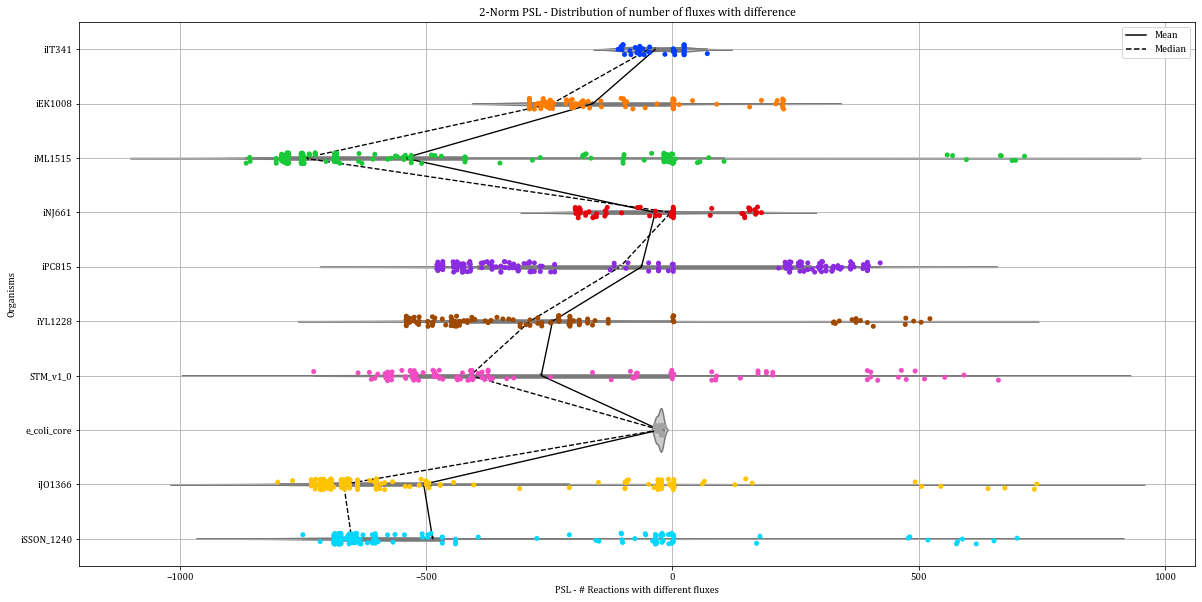

num_diff
Organism               
STM_v1_0    -266.089431
e_coli_core  -25.687500
iEK1008     -161.630769
iIT341       -34.769231
iJO1366     -504.757202
iML1515     -543.800797
iNJ661       -34.683333
iPC815       -62.610465
iSSON_1240  -486.543933
iYL1228     -243.151261

num_diff
Organism             
STM_v1_0       -410.0
e_coli_core     -25.0
iEK1008        -244.5
iIT341          -48.0
iJO1366        -667.0
iML1515        -748.0
iNJ661           -3.0
iPC815         -106.0
iSSON_1240     -651.0
iYL1228        -289.0

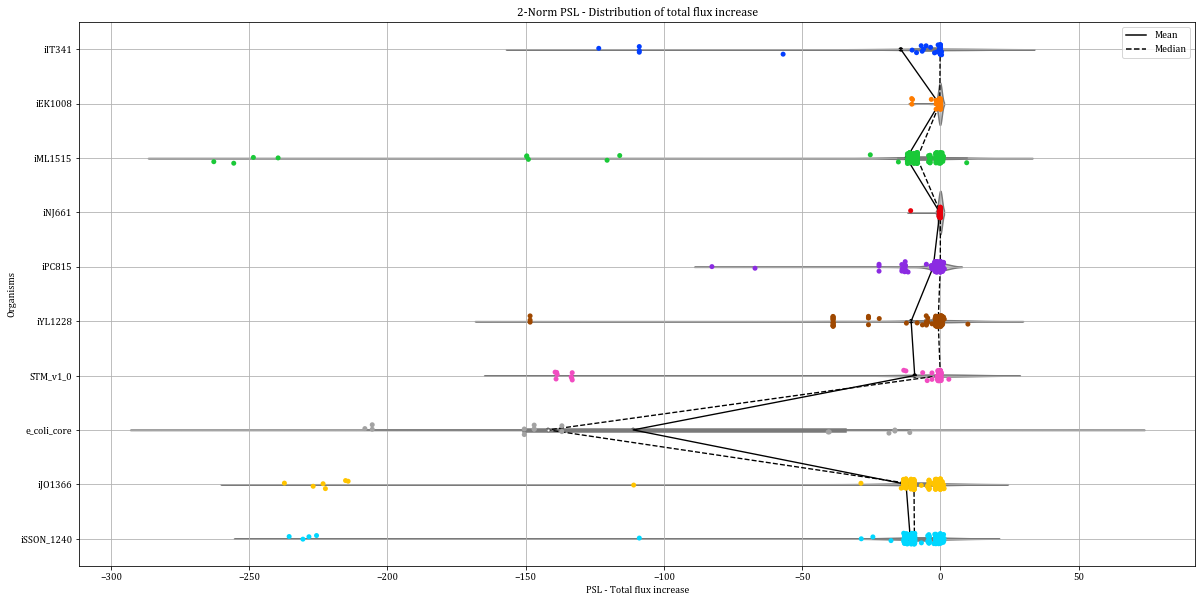

net_diff
Organism               
STM_v1_0      -9.284597
e_coli_core -111.124215
iEK1008       -0.440399
iIT341       -14.318286
iJO1366      -12.425436
iML1515      -12.227491
iNJ661        -0.232298
iPC815        -2.563878
iSSON_1240   -10.886108
iYL1228      -10.577739

net_diff
Organism               
STM_v1_0      -0.023726
e_coli_core -141.903884
iEK1008       -0.217434
iIT341        -0.082727
iJO1366       -9.546251
iML1515       -8.382819
iNJ661        -0.000041
iPC815        -0.029574
iSSON_1240    -9.384732
iYL1228       -0.792279

In [7]:
columns_of_interest = ["sl_size", "common_sl_size", "num_diff", "net_diff"]
fname_list = ["psl_sl_cluster_size", "psl_common_sl_size", "psl_num_diff", "psl_net_diff"]
title_list = ["2-Norm PSL - Distribution of SL cluster size", "2-Norm PSL - Distribution of Common SL cluster size", \
              "2-Norm PSL - Distribution of number of fluxes with difference", "2-Norm PSL - Distribution of total flux increase"]
xlabel_list = ["PSL - # Reactions", "PSL - # Reactions", "PSL - # Reactions with different fluxes", "PSL - Total flux increase"]

for col, fname, title, xlabel in zip(columns_of_interest, fname_list, title_list, xlabel_list):    
    df_select = psl_df_main[[col, "Organism"]]

    plt.figure(figsize=(20,10))
    ax = sns.violinplot(x=col, y="Organism", data=psl_df_main, color="0.8")
                        # palette=sns.color_palette("bright"), 
    ax = sns.stripplot(x=col, y="Organism", data=psl_df_main, 
                    palette=sns.color_palette("bright"), jitter=True)

    ax = sns.pointplot(x=col, y='Organism', ci=None, data=psl_df_main, 
                    color="k", estimator=np.mean, label="mean", scale=0.5) 
    ax = sns.pointplot(x=col, y='Organism', ci=None, data=psl_df_main, color="k", 
                    linestyles='--', estimator=np.median, label="mean", scale=0.5) 

    plt.grid()
    ax.set_title(title)
    ax.set_ylabel("Organisms")
    ax.set_xlabel(xlabel)
    from matplotlib.lines import Line2D
    line1 = Line2D([0], [0], label='Mean', color='k')
    line2 = Line2D([0], [0], label='Median', color='k', ls="--")
    plt.legend(handles=[line1, line2])
    plt.savefig("../results/images/psl_violin_two_"+fname+".png")
    plt.show()

    display(psl_df_main[[col, "Organism"]].groupby("Organism").mean())
    display(psl_df_main[[col, "Organism"]].groupby("Organism").median())

# FBA

## 1. Zero Norm

100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


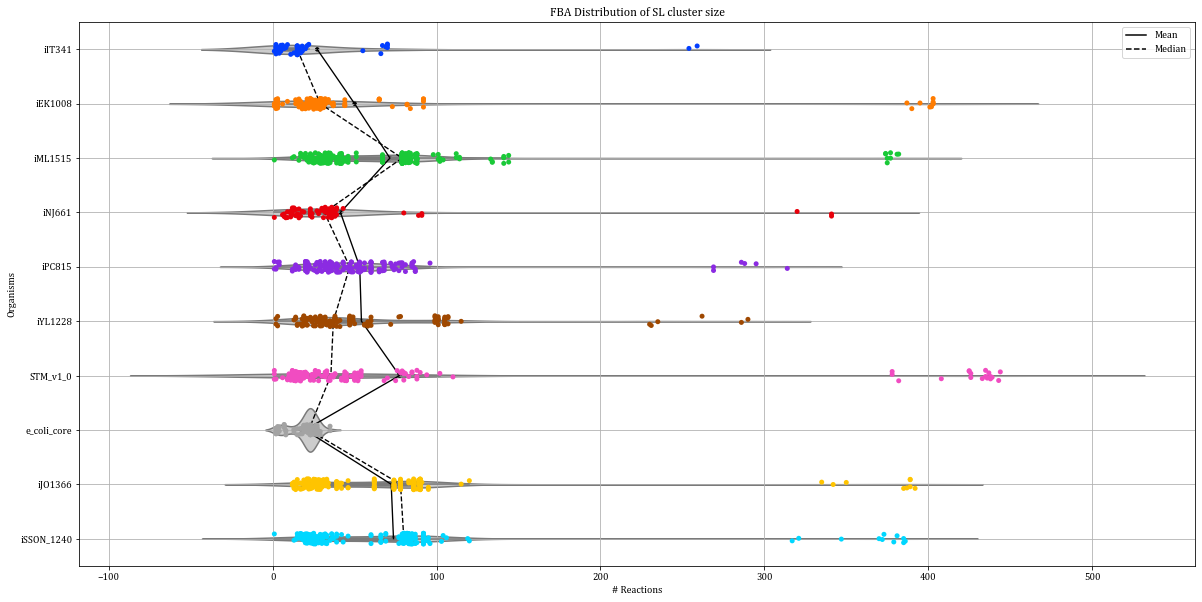

sl_size  median_sl_size
Organism                              
STM_v1_0     77.363095            35.5
e_coli_core  19.727273            22.0
iEK1008      49.993631            29.0
iIT341       27.166667            15.0
iJO1366      72.317164            78.0
iML1515      71.520979            79.0
iNJ661       41.337838            31.5
iPC815       53.100529            47.0
iSSON_1240   73.711610            80.0
iYL1228      54.152778            37.0

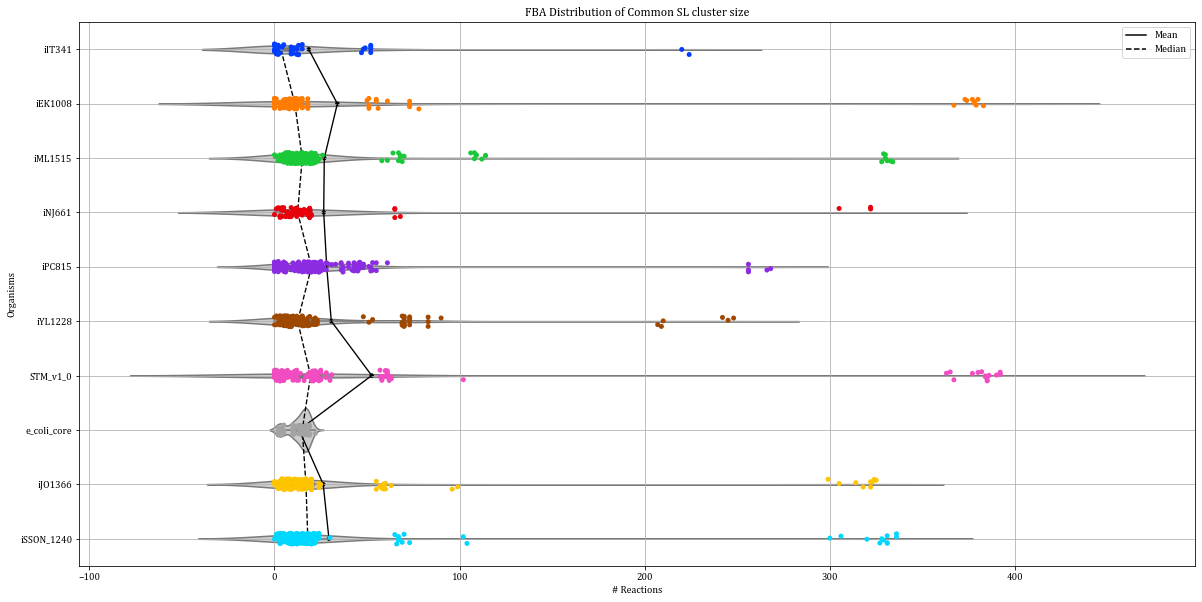

common_sl_size  median_common_sl_size
Organism                                          
STM_v1_0          52.511905                   19.5
e_coli_core       13.340909                   15.0
iEK1008           33.955414                   11.0
iIT341            18.500000                    3.5
iJO1366           26.320896                   17.0
iML1515           26.902098                   15.0
iNJ661            26.594595                   12.5
iPC815            28.211640                   20.0
iSSON_1240        29.411985                   18.0
iYL1228           30.694444                   12.5

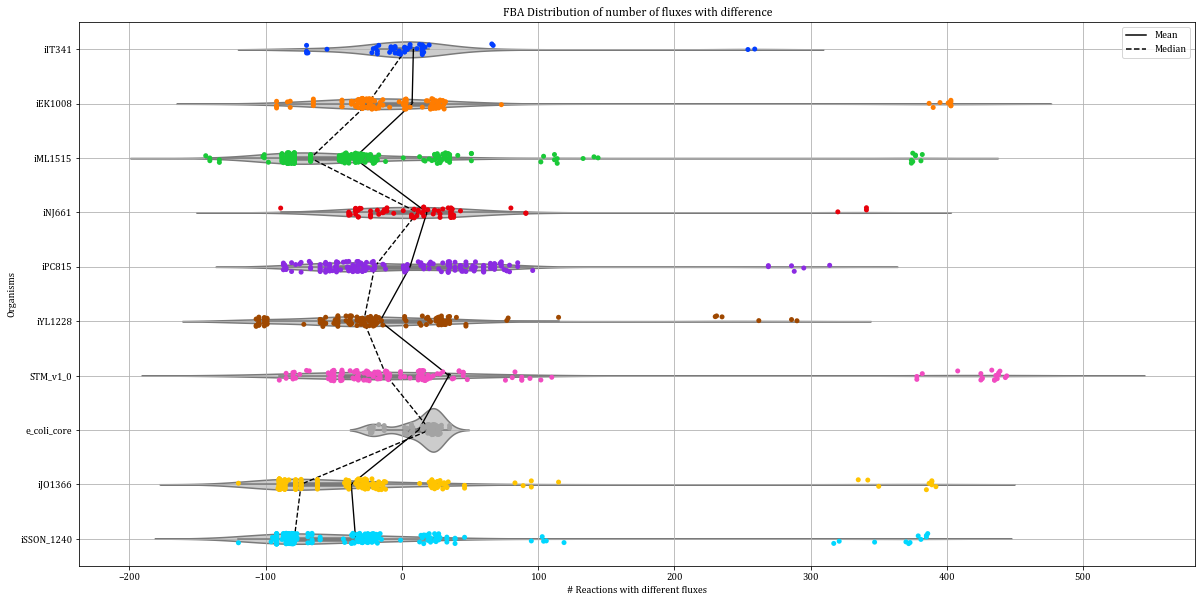

num_diff  median_num_diff
Organism                               
STM_v1_0     34.434524            -11.5
e_coli_core  12.340909             20.5
iEK1008       7.496815            -25.0
iIT341        8.425926              3.0
iJO1366     -37.182836            -74.0
iML1515     -35.003497            -67.0
iNJ661       18.337838             11.5
iPC815        5.925926            -20.0
iSSON_1240  -34.033708            -79.0
iYL1228     -16.055556            -28.0

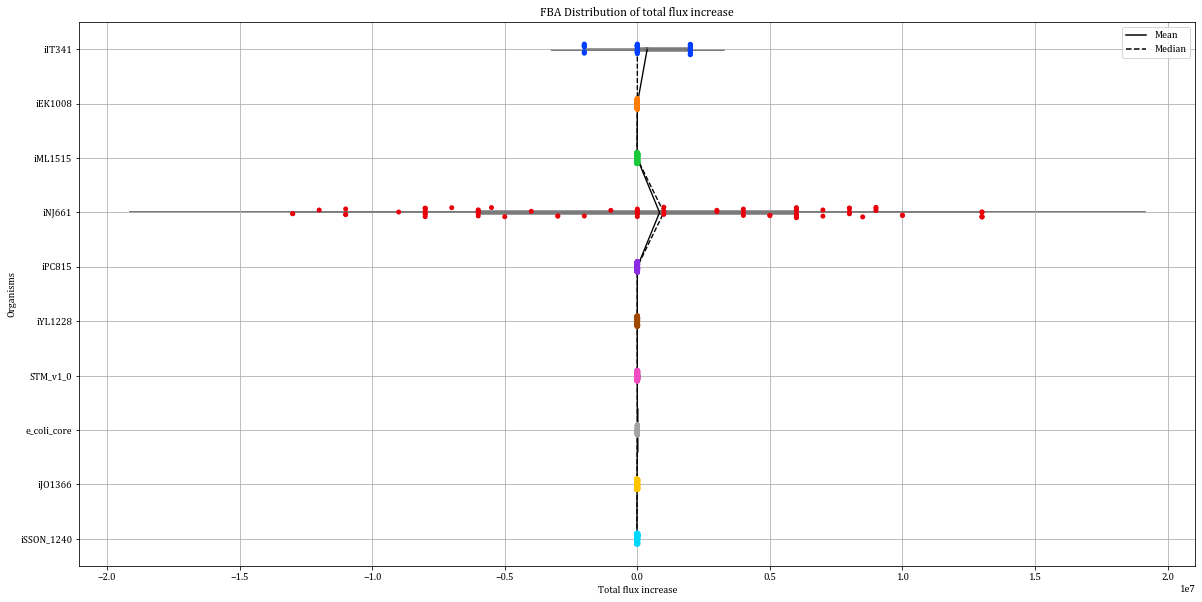

net_diff  median_net_diff
Organism                                   
STM_v1_0      -1352.338439     -3584.423737
e_coli_core     147.292597       171.930236
iEK1008         -17.164448       -18.736821
iIT341       370377.204920         0.431029
iJO1366      -10641.033845    -13044.385206
iML1515       -8164.877078    -12023.528608
iNJ661       837838.682237    999998.568403
iPC815           10.532551     -2047.678765
iSSON_1240   -10869.653207    -16018.751992
iYL1228       -3004.011159     -4996.943159

In [8]:
norm = "zero"
df_main, _, psl_df_main = fba_consolidate_results(model_list, norm)
fba_consolidate_results_print_dfs(df_main, norm)

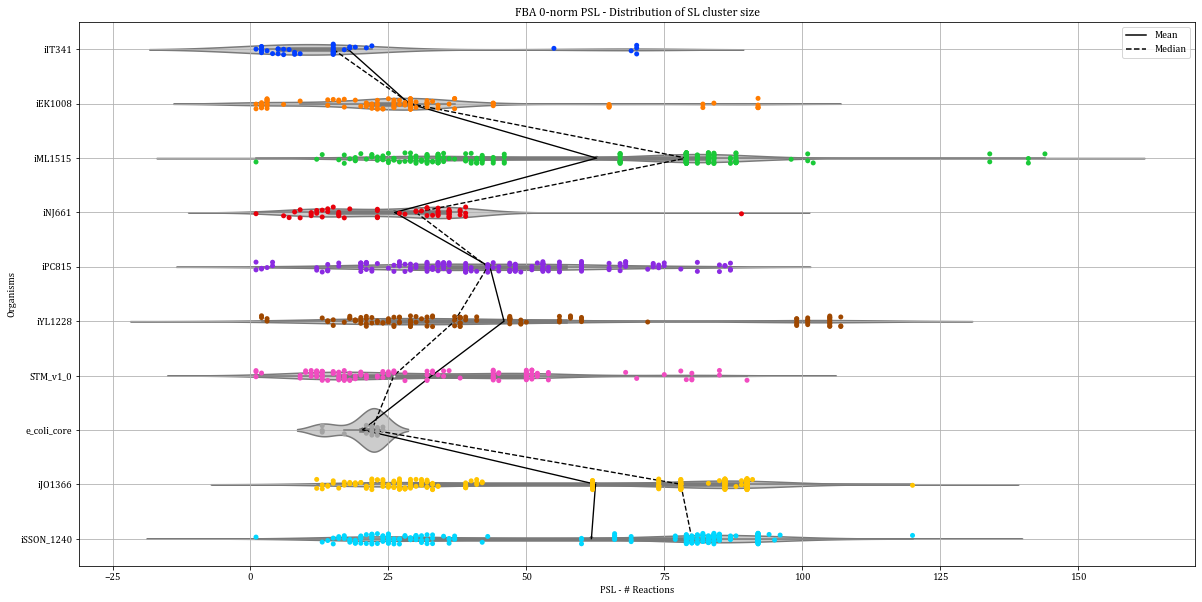

sl_size
Organism              
STM_v1_0     32.894309
e_coli_core  20.312500
iEK1008      28.776923
iIT341       17.717949
iJO1366      62.543210
iML1515      62.741036
iNJ661       26.118644
iPC815       43.401163
iSSON_1240   61.794979
iYL1228      45.957983

sl_size
Organism            
STM_v1_0          26
e_coli_core       22
iEK1008           29
iIT341            15
iJO1366           78
iML1515           79
iNJ661            30
iPC815            43
iSSON_1240        80
iYL1228           37

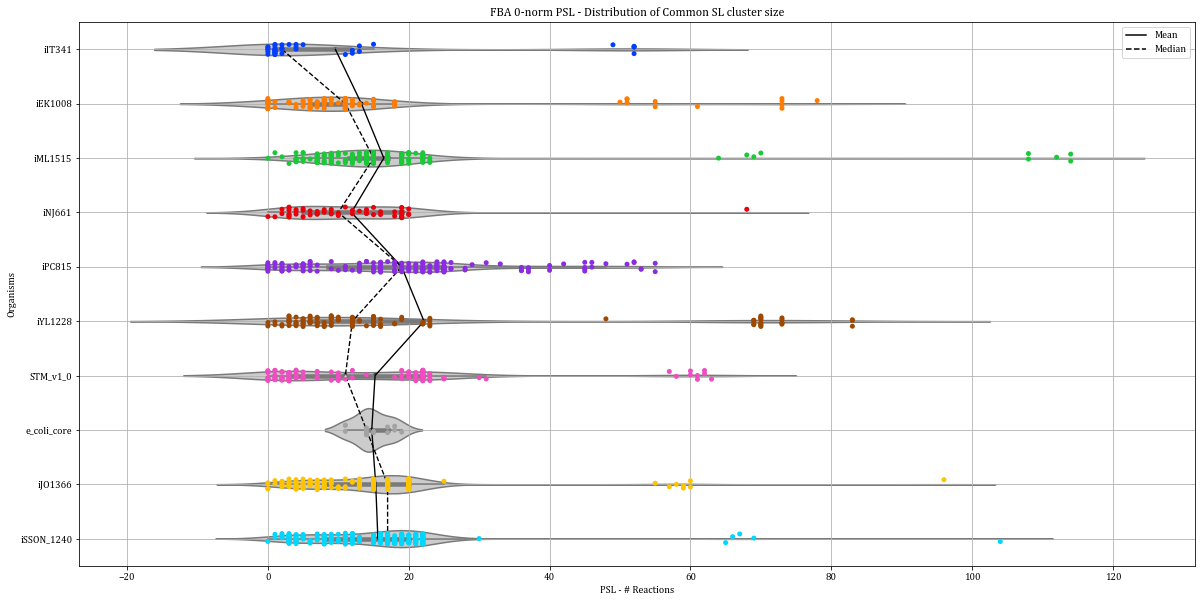

common_sl_size
Organism                   
STM_v1_0          15.219512
e_coli_core       14.750000
iEK1008           13.284615
iIT341             9.589744
iJO1366           15.312757
iML1515           16.462151
iNJ661            11.864407
iPC815            18.994186
iSSON_1240        15.619247
iYL1228           22.168067

common_sl_size
Organism                   
STM_v1_0                 11
e_coli_core              14
iEK1008                  11
iIT341                    2
iJO1366                  17
iML1515                  15
iNJ661                   10
iPC815                   19
iSSON_1240               17
iYL1228                  12

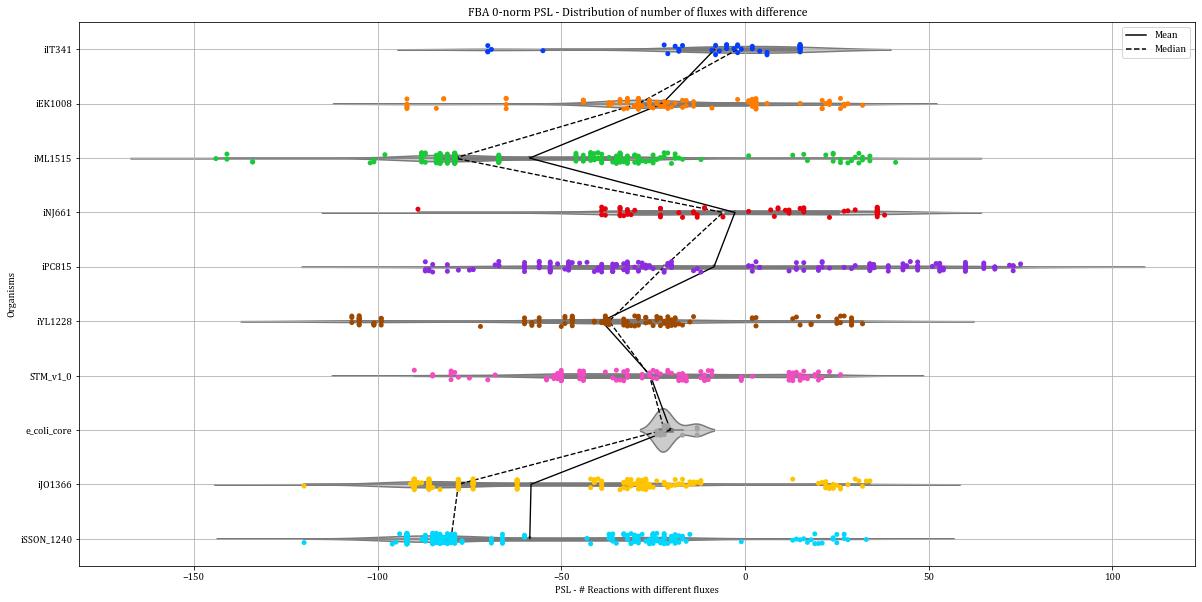

num_diff
Organism              
STM_v1_0    -25.739837
e_coli_core -20.312500
iEK1008     -22.546154
iIT341       -8.230769
iJO1366     -58.222222
iML1515     -58.637450
iNJ661       -2.728814
iPC815       -8.436047
iSSON_1240  -58.573222
iYL1228     -39.000000

num_diff
Organism             
STM_v1_0        -26.0
e_coli_core     -22.0
iEK1008         -29.0
iIT341           -2.0
iJO1366         -78.0
iML1515         -79.0
iNJ661           -6.0
iPC815          -22.0
iSSON_1240      -80.0
iYL1228         -37.0

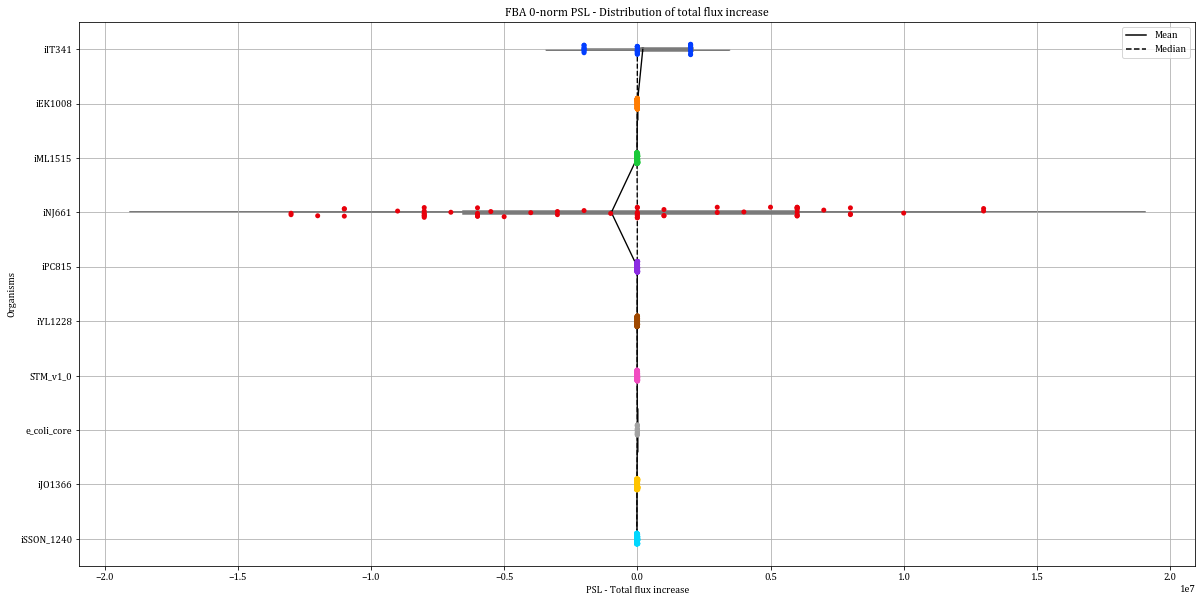

net_diff
Organism                  
STM_v1_0      -5737.722083
e_coli_core    -656.826443
iEK1008        -480.644714
iIT341       205106.881000
iJO1366      -12957.085671
iML1515      -11352.915168
iNJ661      -974576.115049
iPC815         -665.631421
iSSON_1240   -14014.228064
iYL1228       -5549.277039

net_diff
Organism                 
STM_v1_0     -8066.333174
e_coli_core   -190.376903
iEK1008        -18.736821
iIT341          -0.085405
iJO1366     -13992.780207
iML1515     -12029.967901
iNJ661          -0.051578
iPC815       -3572.522968
iSSON_1240  -17017.540244
iYL1228      -6177.340220

In [9]:
columns_of_interest = ["sl_size", "common_sl_size", "num_diff", "net_diff"]
fname_list = ["psl_sl_cluster_size", "psl_common_sl_size", "psl_num_diff", "psl_net_diff"]
title_list = ["FBA 0-norm PSL - Distribution of SL cluster size", "FBA 0-norm PSL - Distribution of Common SL cluster size", \
              "FBA 0-norm PSL - Distribution of number of fluxes with difference", "FBA 0-norm PSL - Distribution of total flux increase"]
xlabel_list = ["PSL - # Reactions", "PSL - # Reactions", "PSL - # Reactions with different fluxes", "PSL - Total flux increase"]

for col, fname, title, xlabel in zip(columns_of_interest, fname_list, title_list, xlabel_list):    
    df_select = psl_df_main[[col, "Organism"]]

    plt.figure(figsize=(20,10))
    ax = sns.violinplot(x=col, y="Organism", data=psl_df_main, color="0.8")
                        # palette=sns.color_palette("bright"), 
    ax = sns.stripplot(x=col, y="Organism", data=psl_df_main, 
                    palette=sns.color_palette("bright"), jitter=True)

    ax = sns.pointplot(x=col, y='Organism', ci=None, data=psl_df_main, 
                    color="k", estimator=np.mean, label="mean", scale=0.5) 
    ax = sns.pointplot(x=col, y='Organism', ci=None, data=psl_df_main, color="k", 
                    linestyles='--', estimator=np.median, label="mean", scale=0.5) 

    plt.grid()
    ax.set_title(title)
    ax.set_ylabel("Organisms")
    ax.set_xlabel(xlabel)
    from matplotlib.lines import Line2D
    line1 = Line2D([0], [0], label='Mean', color='k')
    line2 = Line2D([0], [0], label='Median', color='k', ls="--")
    plt.legend(handles=[line1, line2])
    plt.savefig("../results/images/fba_psl_violin_zero_"+fname+".png")
    plt.show()

    display(psl_df_main[[col, "Organism"]].groupby("Organism").mean())
    display(psl_df_main[[col, "Organism"]].groupby("Organism").median())

## 2. One Norm

100%|██████████| 9/9 [00:06<00:00,  1.48it/s]


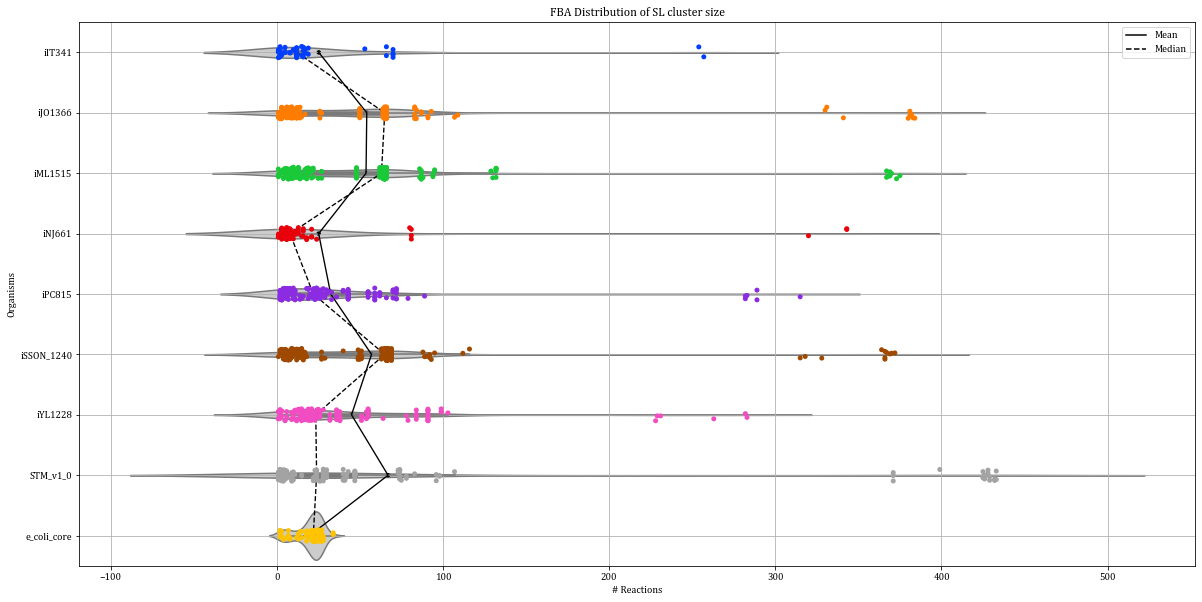

sl_size  median_sl_size
Organism                              
STM_v1_0     66.994048            24.0
e_coli_core  19.784091            22.0
iIT341       25.296296            12.0
iJO1366      54.186567            65.0
iML1515      53.748252            63.0
iNJ661       25.226667             8.0
iPC815       32.492063            22.0
iSSON_1240   57.052434            65.0
iYL1228      45.013889            23.5

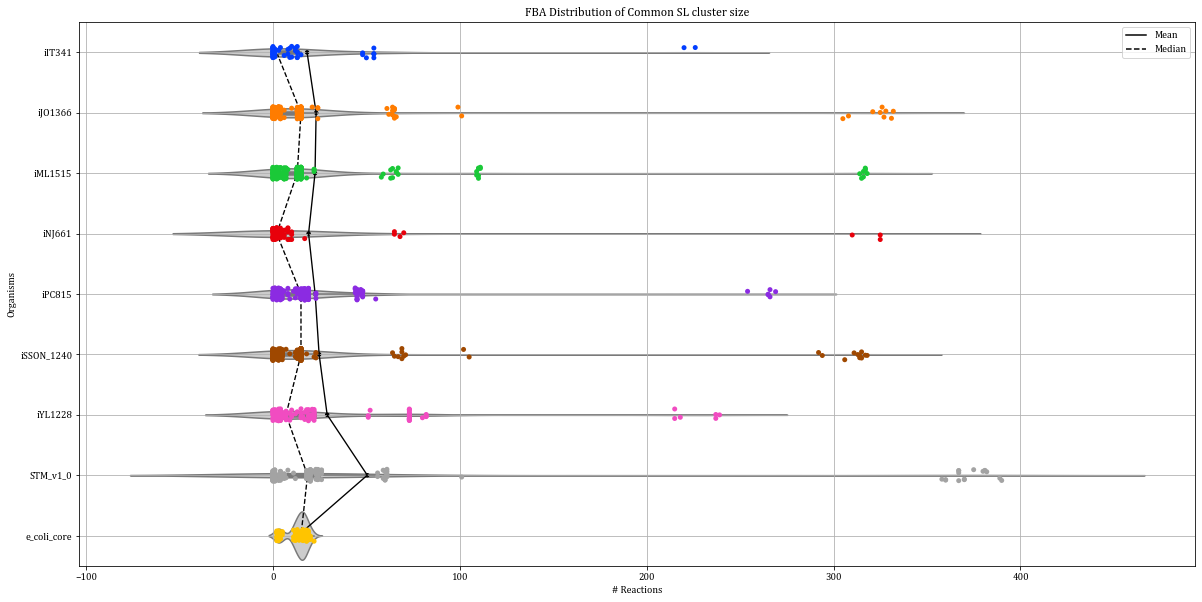

common_sl_size  median_common_sl_size
Organism                                          
STM_v1_0          50.488095                   18.5
e_coli_core       13.375000                   15.0
iIT341            18.259259                    2.0
iJO1366           23.100746                   15.0
iML1515           22.517483                   13.0
iNJ661            19.066667                    2.0
iPC815            22.582011                   15.0
iSSON_1240        24.704120                   15.0
iYL1228           29.006944                    7.0

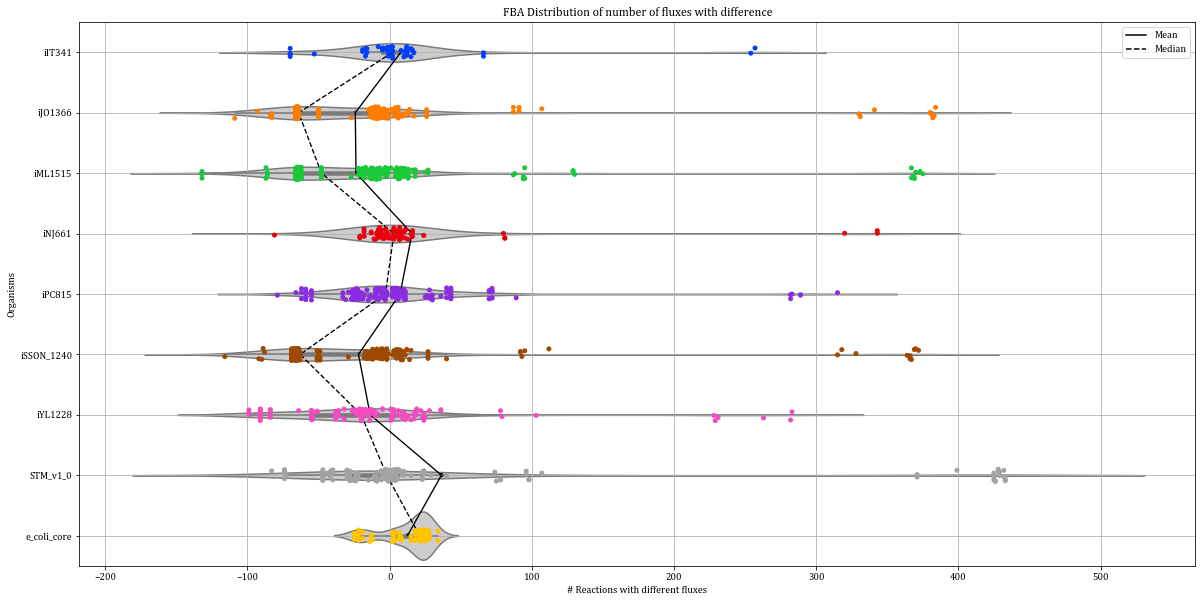

num_diff  median_num_diff
Organism                               
STM_v1_0     36.422619             -2.0
e_coli_core  12.534091             21.0
iIT341        7.777778              2.0
iJO1366     -24.194030            -64.0
iML1515     -23.650350            -48.0
iNJ661       15.733333              3.0
iPC815        7.285714             -3.0
iSSON_1240  -21.936330            -63.0
iYL1228     -13.708333            -20.0

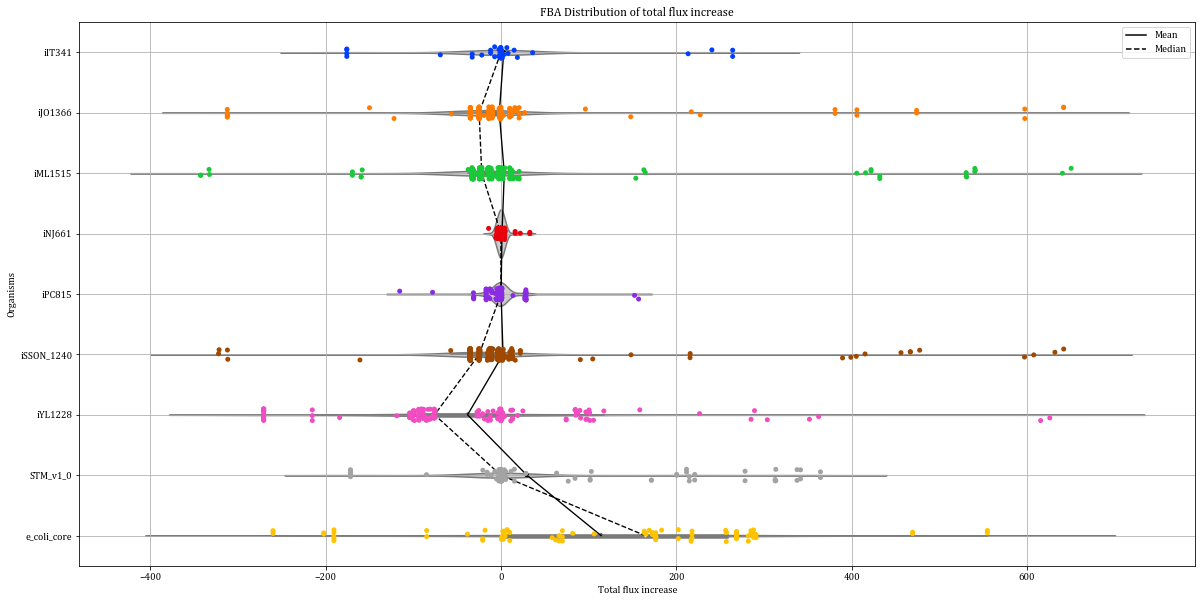

net_diff  median_net_diff
Organism                                
STM_v1_0      29.675846        -0.008419
e_coli_core  114.232292       164.447142
iIT341         3.202736         0.000150
iJO1366       -1.835663       -24.790301
iML1515        3.858697       -21.868424
iNJ661         1.252284         0.022021
iPC815         0.198327        -0.000084
iSSON_1240     2.437558       -24.785813
iYL1228      -38.000944       -75.648465

In [10]:
model_list = ['iIT341', 'iJO1366', 'iML1515', 'iNJ661', 'iPC815', 'iSSON_1240', 'iYL1228', 'STM_v1_0', 'e_coli_core']

norm = "one"
df_main, df_select, psl_df_main = fba_consolidate_results(model_list, norm)
fba_consolidate_results_print_dfs(df_main, norm)

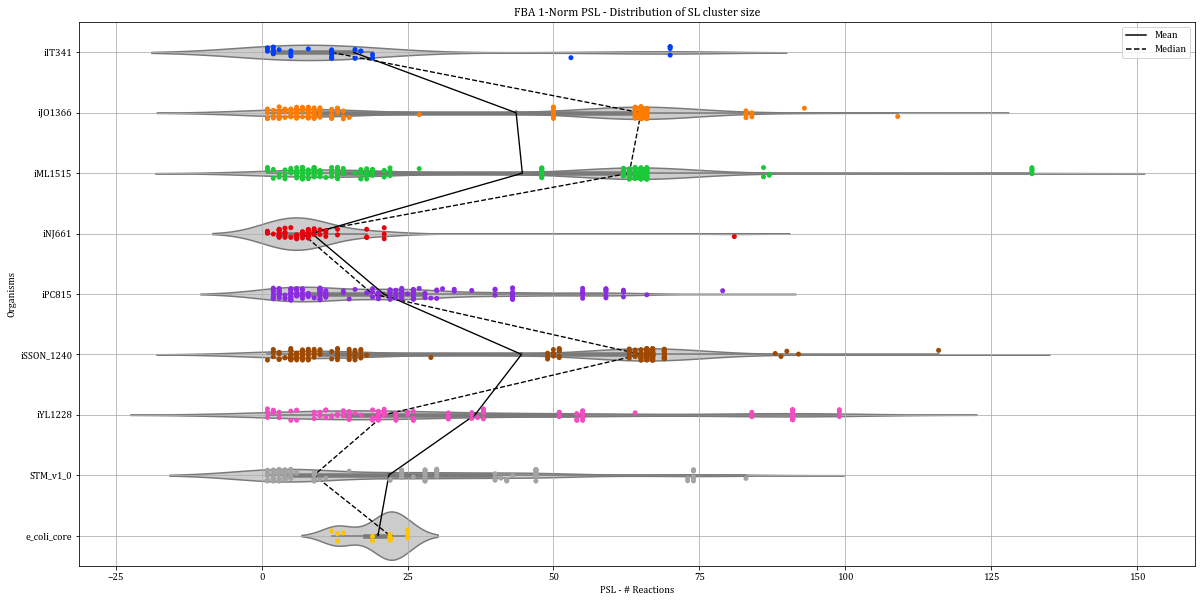

sl_size
Organism              
STM_v1_0     21.796748
e_coli_core  19.937500
iIT341       15.769231
iJO1366      43.609053
iML1515      44.673307
iNJ661        8.633333
iPC815       20.930233
iSSON_1240   44.535565
iYL1228      36.563025

sl_size
Organism            
STM_v1_0           9
e_coli_core       22
iIT341            12
iJO1366           65
iML1515           63
iNJ661             7
iPC815            19
iSSON_1240        65
iYL1228           21

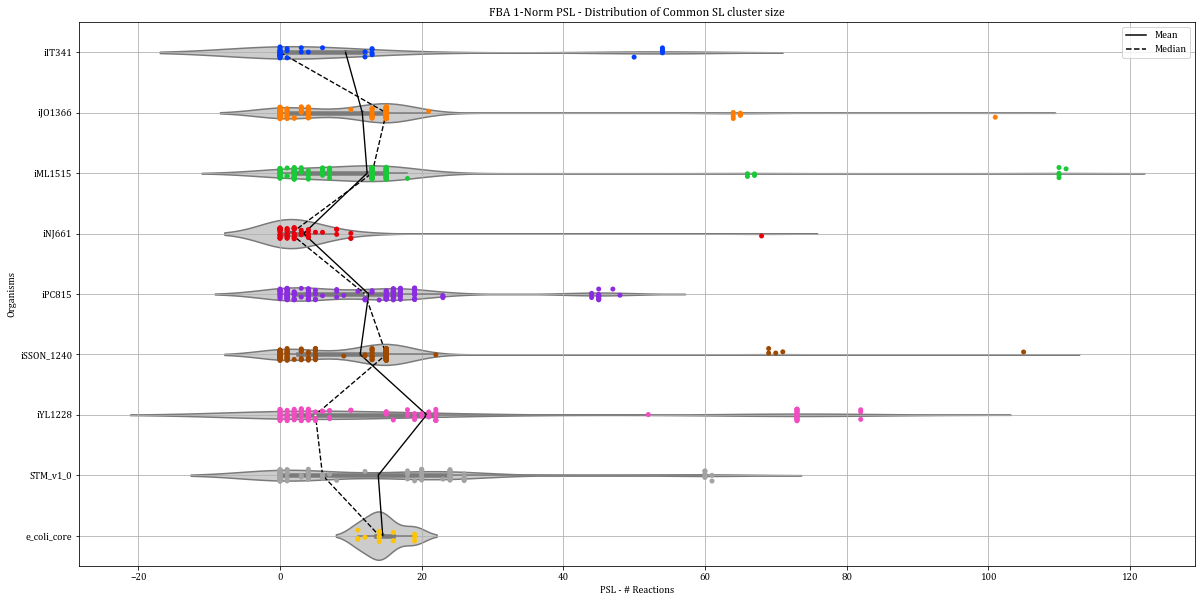

common_sl_size
Organism                   
STM_v1_0          13.869919
e_coli_core       14.500000
iIT341             9.256410
iJO1366           11.617284
iML1515           12.298805
iNJ661             3.333333
iPC815            12.511628
iSSON_1240        11.317992
iYL1228           20.697479

common_sl_size
Organism                   
STM_v1_0                6.0
e_coli_core            14.0
iIT341                  0.0
iJO1366                15.0
iML1515                13.0
iNJ661                  1.5
iPC815                 12.0
iSSON_1240             15.0
iYL1228                 5.0

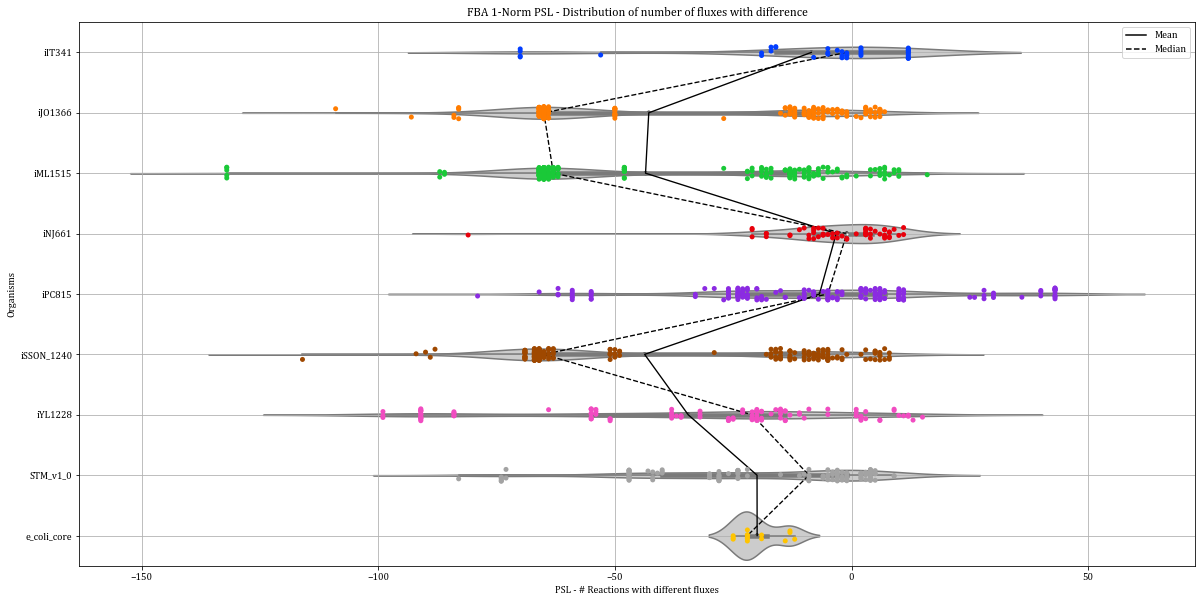

num_diff
Organism              
STM_v1_0    -19.959350
e_coli_core -19.937500
iIT341       -8.487179
iJO1366     -42.835391
iML1515     -43.517928
iNJ661       -3.233333
iPC815       -6.767442
iSSON_1240  -43.707113
iYL1228     -34.495798

num_diff
Organism             
STM_v1_0         -9.0
e_coli_core     -22.0
iIT341           -1.0
iJO1366         -65.0
iML1515         -63.0
iNJ661           -1.0
iPC815           -5.0
iSSON_1240      -65.0
iYL1228         -21.0

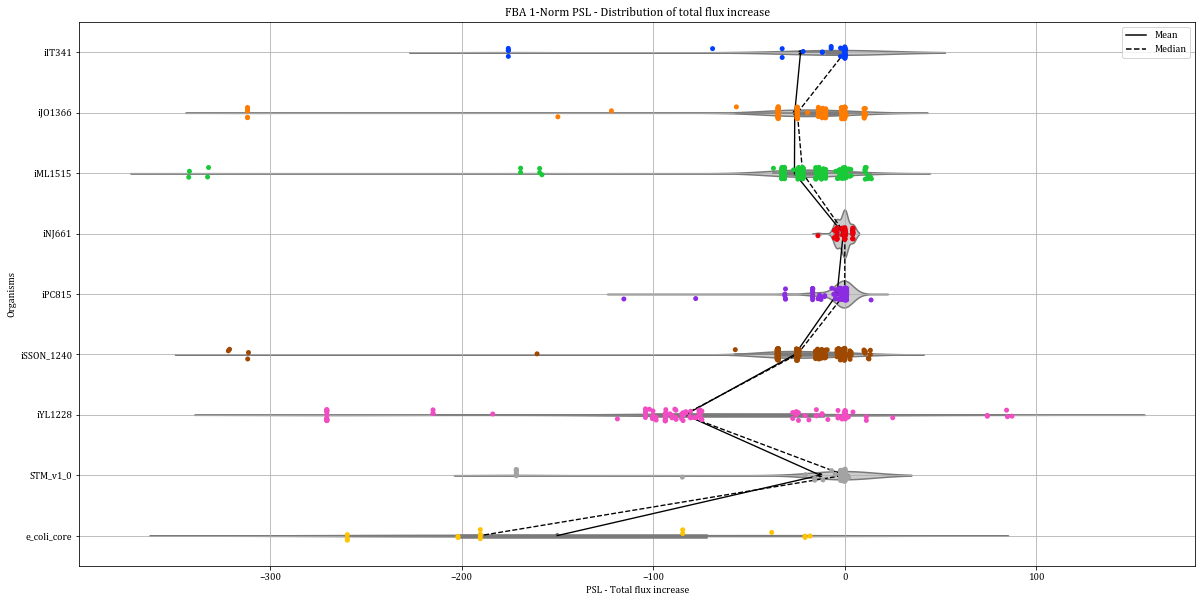

net_diff
Organism               
STM_v1_0     -12.892119
e_coli_core -150.159421
iIT341       -23.128866
iJO1366      -26.159172
iML1515      -26.309605
iNJ661        -0.831372
iPC815        -4.040507
iSSON_1240   -26.025264
iYL1228      -83.361546

net_diff
Organism               
STM_v1_0      -0.056477
e_coli_core -190.376903
iIT341        -0.069197
iJO1366      -24.790517
iML1515      -22.027270
iNJ661        -0.000550
iPC815        -0.028596
iSSON_1240   -24.797527
iYL1228      -83.971811

In [11]:
columns_of_interest = ["sl_size", "common_sl_size", "num_diff", "net_diff"]
fname_list = ["psl_sl_cluster_size", "psl_common_sl_size", "psl_num_diff", "psl_net_diff"]
title_list = ["FBA 1-Norm PSL - Distribution of SL cluster size", "FBA 1-Norm PSL - Distribution of Common SL cluster size", \
              "FBA 1-Norm PSL - Distribution of number of fluxes with difference", "FBA 1-Norm PSL - Distribution of total flux increase"]
xlabel_list = ["PSL - # Reactions", "PSL - # Reactions", "PSL - # Reactions with different fluxes", "PSL - Total flux increase"]

for col, fname, title, xlabel in zip(columns_of_interest, fname_list, title_list, xlabel_list):    
    df_select = psl_df_main[[col, "Organism"]]

    plt.figure(figsize=(20,10))
    ax = sns.violinplot(x=col, y="Organism", data=psl_df_main, color="0.8")
                        # palette=sns.color_palette("bright"), 
    ax = sns.stripplot(x=col, y="Organism", data=psl_df_main, 
                    palette=sns.color_palette("bright"), jitter=True)

    ax = sns.pointplot(x=col, y='Organism', ci=None, data=psl_df_main, 
                    color="k", estimator=np.mean, label="mean", scale=0.5) 
    ax = sns.pointplot(x=col, y='Organism', ci=None, data=psl_df_main, color="k", 
                    linestyles='--', estimator=np.median, label="mean", scale=0.5) 

    plt.grid()
    ax.set_title(title)
    ax.set_ylabel("Organisms")
    ax.set_xlabel(xlabel)
    from matplotlib.lines import Line2D
    line1 = Line2D([0], [0], label='Mean', color='k')
    line2 = Line2D([0], [0], label='Median', color='k', ls="--")
    plt.legend(handles=[line1, line2])
    plt.savefig("../results/images/fba_psl_violin_one_"+fname+".png")
    plt.show()

    display(psl_df_main[[col, "Organism"]].groupby("Organism").mean())
    display(psl_df_main[[col, "Organism"]].groupby("Organism").median())

## 3. Two Norm

100%|██████████| 9/9 [00:06<00:00,  1.34it/s]


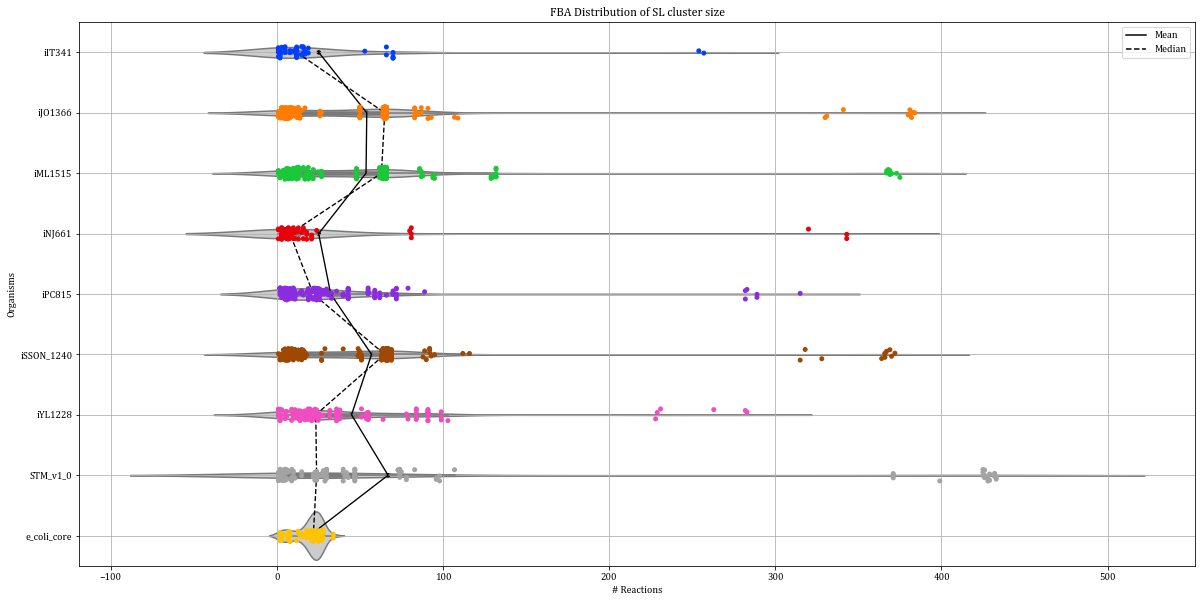

sl_size  median_sl_size
Organism                              
STM_v1_0     66.994048            24.0
e_coli_core  19.784091            22.0
iIT341       25.296296            12.0
iJO1366      54.186567            65.0
iML1515      53.748252            63.0
iNJ661       25.226667             8.0
iPC815       32.492063            22.0
iSSON_1240   57.052434            65.0
iYL1228      45.013889            23.5

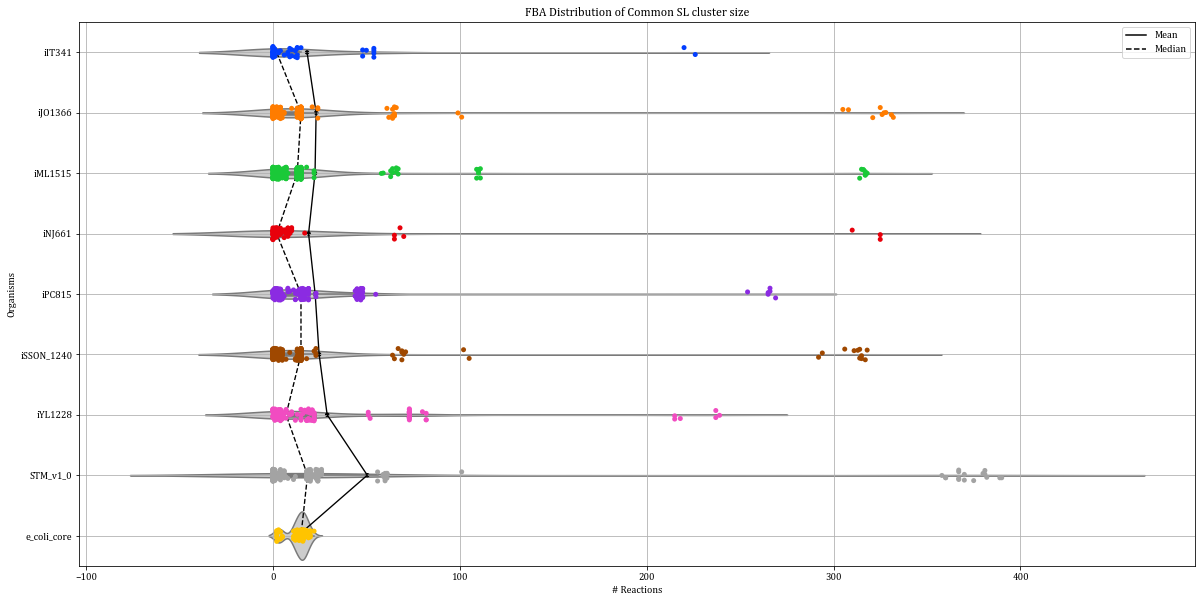

common_sl_size  median_common_sl_size
Organism                                          
STM_v1_0          50.488095                   18.5
e_coli_core       13.375000                   15.0
iIT341            18.259259                    2.0
iJO1366           23.100746                   15.0
iML1515           22.517483                   13.0
iNJ661            19.066667                    2.0
iPC815            22.582011                   15.0
iSSON_1240        24.704120                   15.0
iYL1228           29.006944                    7.0

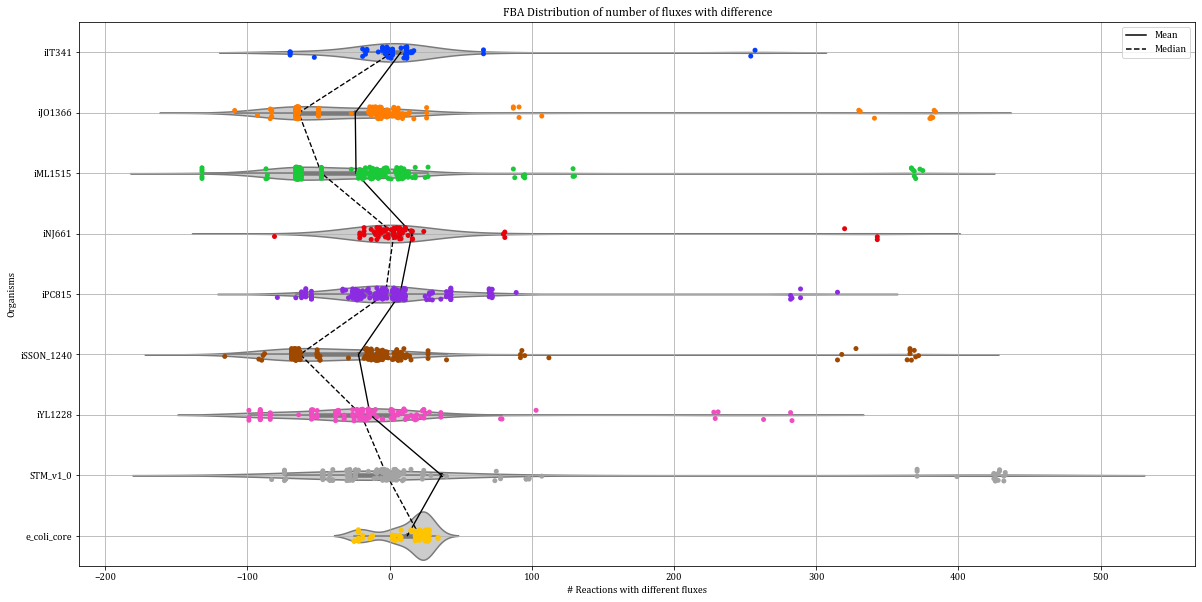

num_diff  median_num_diff
Organism                               
STM_v1_0     36.422619             -2.0
e_coli_core  12.534091             21.0
iIT341        7.777778              2.0
iJO1366     -24.194030            -64.0
iML1515     -23.650350            -48.0
iNJ661       15.733333              3.0
iPC815        7.285714             -3.0
iSSON_1240  -21.936330            -63.0
iYL1228     -13.708333            -20.0

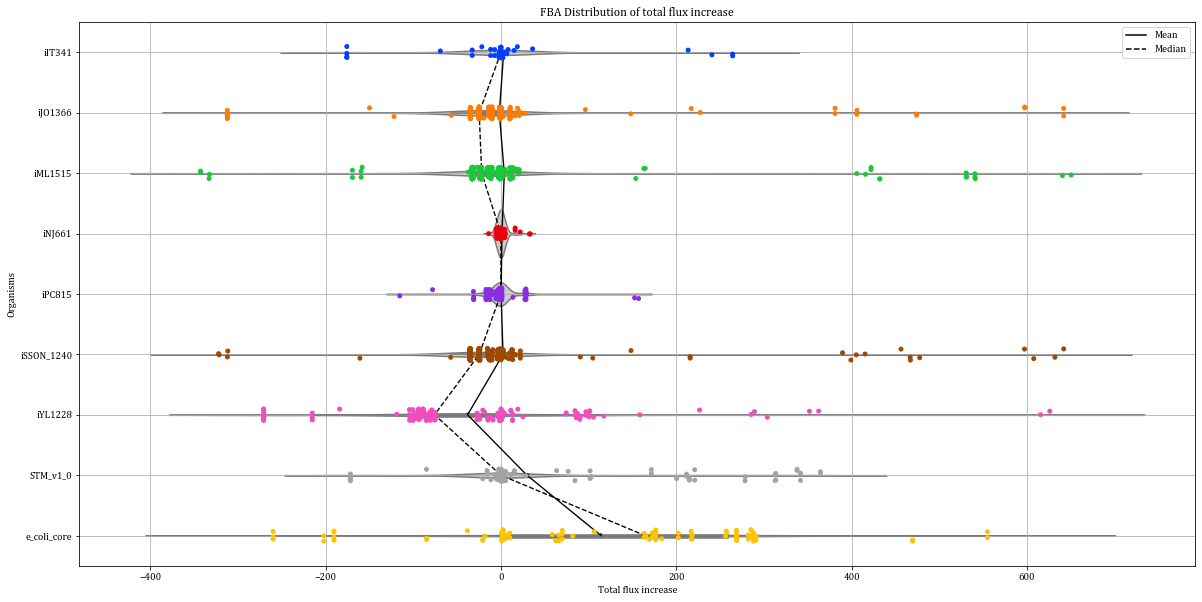

net_diff  median_net_diff
Organism                                
STM_v1_0      29.675846        -0.008419
e_coli_core  114.232292       164.447142
iIT341         3.202736         0.000150
iJO1366       -1.835663       -24.790301
iML1515        3.858697       -21.868424
iNJ661         1.252284         0.022021
iPC815         0.198327        -0.000084
iSSON_1240     2.437558       -24.785813
iYL1228      -38.000944       -75.648465

In [12]:
orm = "two"
df_main, df_select, psl_df_main = fba_consolidate_results(model_list, norm)
fba_consolidate_results_print_dfs(df_main, norm)

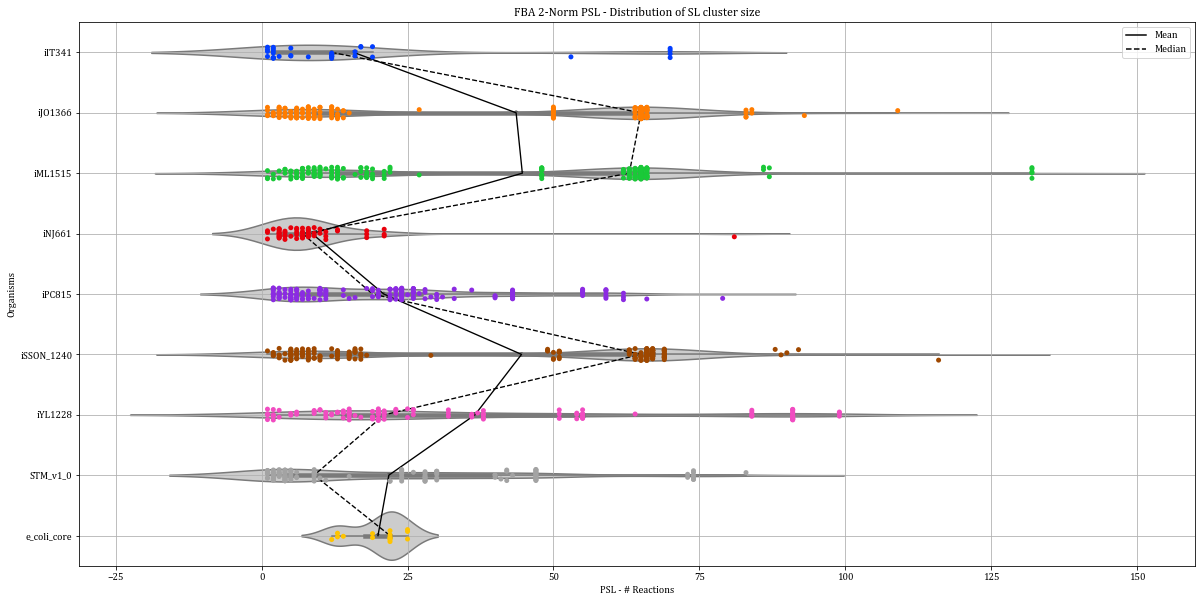

sl_size
Organism              
STM_v1_0     21.796748
e_coli_core  19.937500
iIT341       15.769231
iJO1366      43.609053
iML1515      44.673307
iNJ661        8.633333
iPC815       20.930233
iSSON_1240   44.535565
iYL1228      36.563025

sl_size
Organism            
STM_v1_0           9
e_coli_core       22
iIT341            12
iJO1366           65
iML1515           63
iNJ661             7
iPC815            19
iSSON_1240        65
iYL1228           21

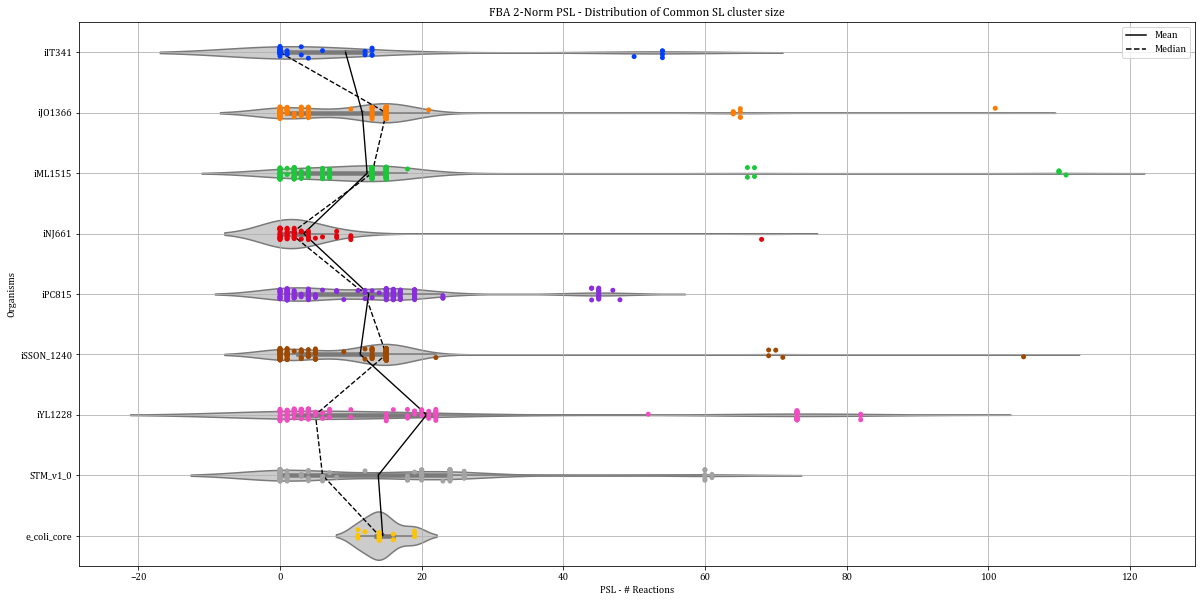

common_sl_size
Organism                   
STM_v1_0          13.869919
e_coli_core       14.500000
iIT341             9.256410
iJO1366           11.617284
iML1515           12.298805
iNJ661             3.333333
iPC815            12.511628
iSSON_1240        11.317992
iYL1228           20.697479

common_sl_size
Organism                   
STM_v1_0                6.0
e_coli_core            14.0
iIT341                  0.0
iJO1366                15.0
iML1515                13.0
iNJ661                  1.5
iPC815                 12.0
iSSON_1240             15.0
iYL1228                 5.0

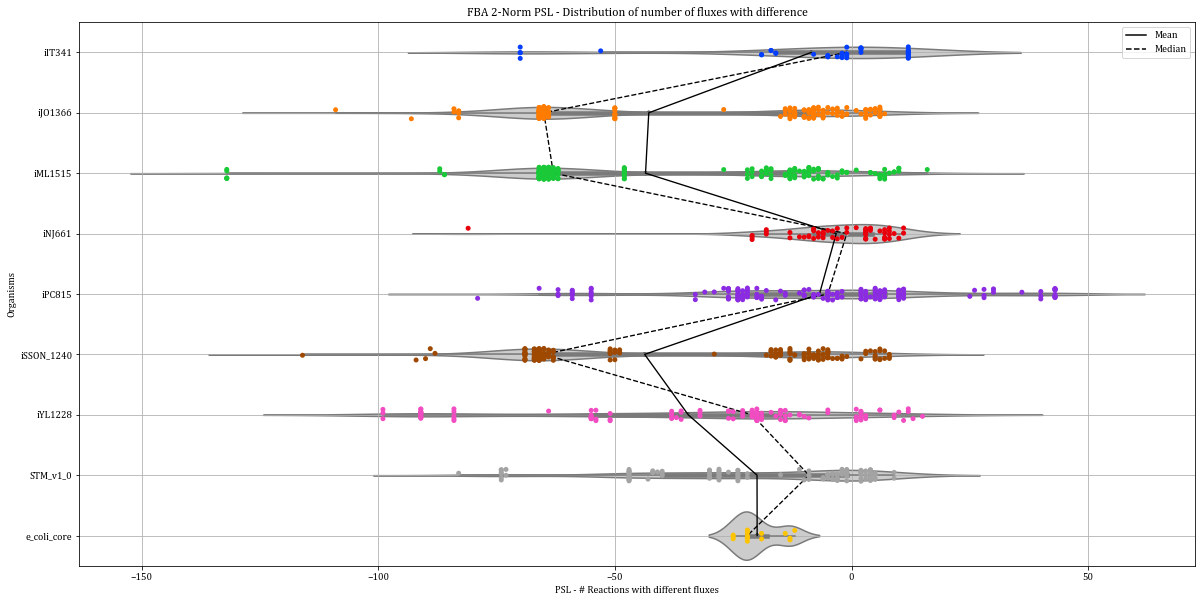

num_diff
Organism              
STM_v1_0    -19.959350
e_coli_core -19.937500
iIT341       -8.487179
iJO1366     -42.835391
iML1515     -43.517928
iNJ661       -3.233333
iPC815       -6.767442
iSSON_1240  -43.707113
iYL1228     -34.495798

num_diff
Organism             
STM_v1_0         -9.0
e_coli_core     -22.0
iIT341           -1.0
iJO1366         -65.0
iML1515         -63.0
iNJ661           -1.0
iPC815           -5.0
iSSON_1240      -65.0
iYL1228         -21.0

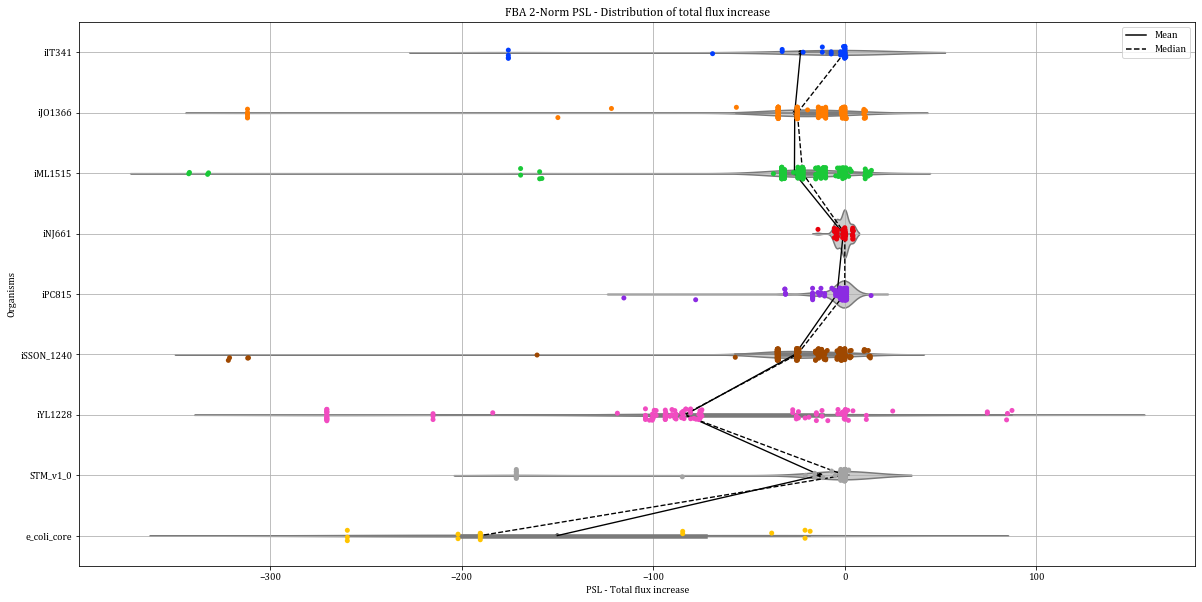

net_diff
Organism               
STM_v1_0     -12.892119
e_coli_core -150.159421
iIT341       -23.128866
iJO1366      -26.159172
iML1515      -26.309605
iNJ661        -0.831372
iPC815        -4.040507
iSSON_1240   -26.025264
iYL1228      -83.361546

net_diff
Organism               
STM_v1_0      -0.056477
e_coli_core -190.376903
iIT341        -0.069197
iJO1366      -24.790517
iML1515      -22.027270
iNJ661        -0.000550
iPC815        -0.028596
iSSON_1240   -24.797527
iYL1228      -83.971811

In [13]:
columns_of_interest = ["sl_size", "common_sl_size", "num_diff", "net_diff"]
fname_list = ["psl_sl_cluster_size", "psl_common_sl_size", "psl_num_diff", "psl_net_diff"]
title_list = ["FBA 2-Norm PSL - Distribution of SL cluster size", "FBA 2-Norm PSL - Distribution of Common SL cluster size", \
              "FBA 2-Norm PSL - Distribution of number of fluxes with difference", "FBA 2-Norm PSL - Distribution of total flux increase"]
xlabel_list = ["PSL - # Reactions", "PSL - # Reactions", "PSL - # Reactions with different fluxes", "PSL - Total flux increase"]

for col, fname, title, xlabel in zip(columns_of_interest, fname_list, title_list, xlabel_list):    
    df_select = psl_df_main[[col, "Organism"]]

    plt.figure(figsize=(20,10))
    ax = sns.violinplot(x=col, y="Organism", data=psl_df_main, color="0.8")
                        # palette=sns.color_palette("bright"), 
    ax = sns.stripplot(x=col, y="Organism", data=psl_df_main, 
                    palette=sns.color_palette("bright"), jitter=True)

    ax = sns.pointplot(x=col, y='Organism', ci=None, data=psl_df_main, 
                    color="k", estimator=np.mean, label="mean", scale=0.5) 
    ax = sns.pointplot(x=col, y='Organism', ci=None, data=psl_df_main, color="k", 
                    linestyles='--', estimator=np.median, label="mean", scale=0.5) 

    plt.grid()
    ax.set_title(title)
    ax.set_ylabel("Organisms")
    ax.set_xlabel(xlabel)
    from matplotlib.lines import Line2D
    line1 = Line2D([0], [0], label='Mean', color='k')
    line2 = Line2D([0], [0], label='Median', color='k', ls="--")
    plt.legend(handles=[line1, line2])
    plt.savefig("../results/images/fba_psl_violin_two_"+fname+".png")
    plt.show()

    display(psl_df_main[[col, "Organism"]].groupby("Organism").mean())
    display(psl_df_main[[col, "Organism"]].groupby("Organism").median())